## Environmental determinants of incident clonal hematopoiesis: 
### logistic regression

In [1]:
library(data.table) # version 1.14.6
library(dplyr)
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/epi/")


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [4]:
# Load data
## 0/1 CH status
# aric_baseline_n_v05 <- fread("../pheno/aric_baseline_n_v05_N4189.pheno_ch_status_trajectory.23Mar2023.csv", header=T)
# aric_baseline_n_v05$dAge <- aric_baseline_n_v05$Age - aric_baseline_n_v05$age_base
#summary(aric_baseline_n_v05$dAge)
aric_baseline_n_v05_noPrevHeme <- fread("../pheno/aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", header=T)
# 
aric_baseline_n_v05_noPrevHeme$dAge <- aric_baseline_n_v05_noPrevHeme$Age - aric_baseline_n_v05_noPrevHeme$age_base
summary(aric_baseline_n_v05_noPrevHeme$dAge)
nrow(aric_baseline_n_v05_noPrevHeme)
table(aric_baseline_n_v05_noPrevHeme$incident_CH)
# CH variants
# # com.expansion.CH_v_b_v5_all <- fread("../pheno/combined.expansion.CH_v_b_v5_all.growth_rate.23Mar2023.csv", header=T)
# qcd CH variants with phenotypes
# ch_var_in_v05_qcd.pheno <- fread("ch_var_in_v05_qcd_pheno.23Mar2023.csv", header = T)
aric_baseline_n_v05 <- aric_baseline_n_v05_noPrevHeme

## corrected lipid values
lipids_base <- fread("../pheno//aric_baseline_vanilla_02082023.csv", header=T, sep="\t")
str(lipids_base)
summary(lipids_base$ldl_base)

table(lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   21.00   20.31   21.00   27.00 

[1] 4187


   0    1 
2995  735 

Classes 'data.table' and 'data.frame':	10881 obs. of  33 variables:
 $ gwasid       : chr  "A03873" "A11144" "A01476" "A02423" ...
 $ hg38_CRAM_ID : chr  "10047" "10382" "10566" "10665" ...
 $ aricid       : chr  "J136997" "J211628" "J201860" "J207189" ...
 $ Visit        : chr  "V01" "V01" "V01" "V01" ...
 $ sex_base     : chr  "F" "F" "F" "F" ...
 $ race_base    : chr  "B" "B" "B" "B" ...
 $ center_base  : chr  "J" "J" "J" "J" ...
 $ dob_base     : IDate, format: "1939-01-25" "1934-09-01" ...
 $ date_base    : IDate, format: "1987-06-29" "1988-07-25" ...
 $ age_base     : int  48 53 56 63 58 51 62 62 54 63 ...
 $ fast_8_base  : int  0 1 1 1 1 1 1 1 1 1 ...
 $ bmi_base     : num  30.5 30.4 27.3 24.8 29.1 ...
 $ dm_126_base  : int  0 0 0 0 1 0 0 NA 0 0 ...
 $ gluc_base    : num  105.8 86.9 95.3 90.4 128 ...
 $ htn_5_base   : int  1 0 1 0 1 0 0 1 1 1 ...
 $ chol_base    : num  255 253 196 244 328 256 196 NA 201 321 ...
 $ hdl_base     : num  87.6 36.6 49.1 79 53.9 ...
 $ ldl_base     : 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   108.5   130.4   132.7   154.4   467.4     210 


FALSE  TRUE 
 6694  4187 

       V1         
 Min.   :-2.5509  
 1st Qu.:-0.6820  
 Median :-0.1542  
 Mean   : 0.0000  
 3rd Qu.: 0.5001  
 Max.   : 6.9950  
 NA's   :20       

       V1          
 Min.   :-3.69072  
 1st Qu.:-0.67315  
 Median :-0.06408  
 Mean   : 0.00000  
 3rd Qu.: 0.60340  
 Max.   : 9.30847  
 NA's   :210       

       V1          
 Min.   :-9.05322  
 1st Qu.:-0.57262  
 Median : 0.07237  
 Mean   : 0.00000  
 3rd Qu.: 0.66802  
 Max.   : 4.57335  
 NA's   :210       

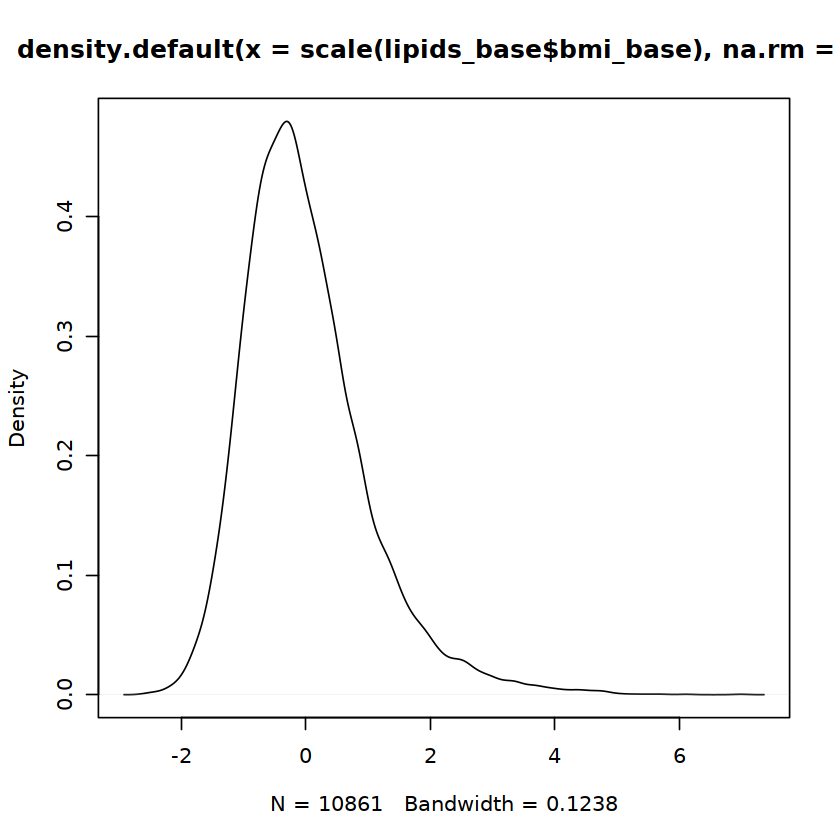

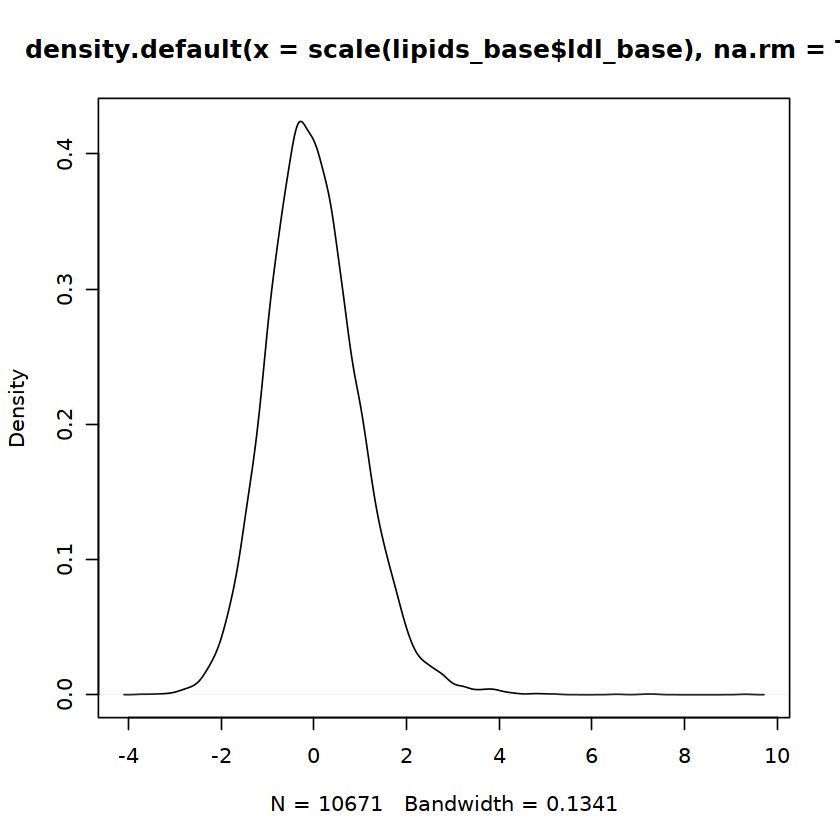

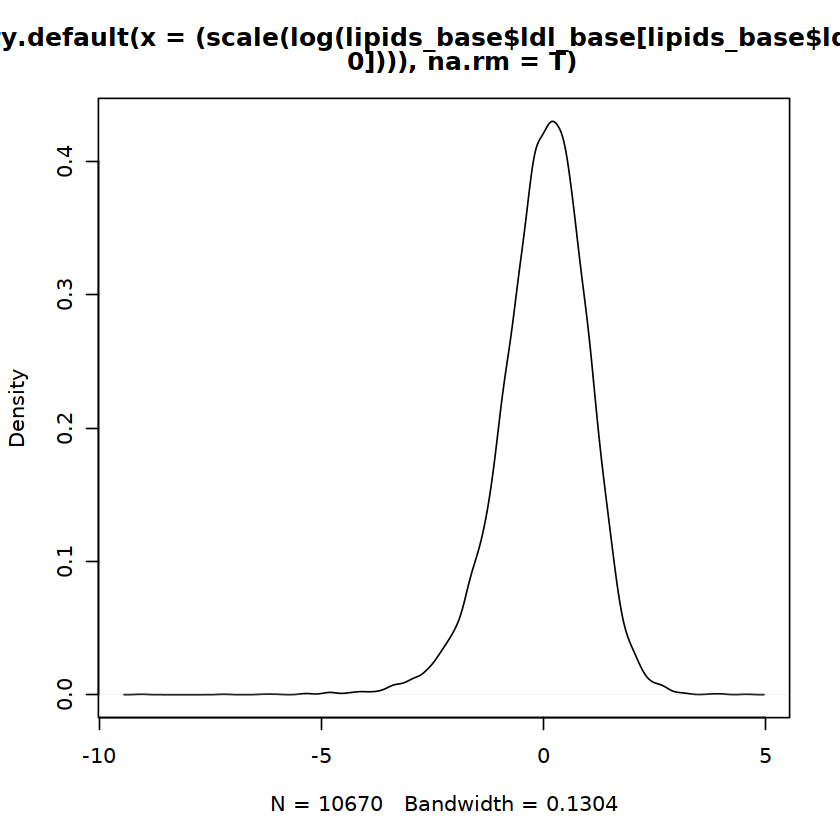

In [16]:

summary(scale(lipids_base$bmi_base))

summary(scale(lipids_base$ldl_base))

summary(scale(log(lipids_base$ldl_base[lipids_base$ldl_base>0])))


plot(density(scale(lipids_base$bmi_base), na.rm = T))

plot(density(scale(lipids_base$ldl_base), na.rm = T))

plot(density((scale(log(lipids_base$ldl_base[lipids_base$ldl_base>0]))), na.rm = T))



In [5]:
summary(lipids_base$ldl_base)

table(lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)

aric_baseline_n_v05.v2 <- merge(aric_baseline_n_v05, lipids_base[], by.x="GWAS_ID", by.y = "gwasid")

lipids_base_n4187 <- subset(lipids_base, lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)
summary(lipids_base_n4187$ldl_base)
sd(lipids_base_n4187$ldl_base, na.rm = T)

summary(lipids_base_n4187$hdl_base)
sd(lipids_base_n4187$hdl_base, na.rm = T)

names(aric_baseline_n_v05.v2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   108.5   130.4   132.7   154.4   467.4     210 


FALSE  TRUE 
 6694  4187 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    9.8   107.8   128.4   130.6   151.0   396.8      74 

[1] 34.43623

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   40.00   50.00   51.99   62.00  141.00      15 

[1] 16.96968

[1] "GWAS_ID"              "ARIC_ID"              "GWASID_Visit"        
  [4] "cram_id"              "Visit.x"              "Gender"              
  [7] "Age"                  "CH_baseline"          "CH_v05"              
 [10] "incident_CH"          "incident_CHvaf05"     "incident_CHvaf10"    
 [13] "incident_DNMT3A"      "incident_TET2"        "incident_ASXL1"      
 [16] "incident_DTA"         "incident_SF"          "incident_DDR"        
 [19] "sex_v5"               "race_v5"              "center_v5"           
 [22] "dob_v5"               "date_v5"              "age_v5"              
 [25] "fast_8_v5"            "bmi_v5"               "dm_126_v5"           
 [28] "gluc_v5"              "htn_5_v5"             "chol_v5"             
 [31] "hdl_v5"               "ldl_v5"               "tg_v5"               
 [34] "chol_med_v5"          "statin_v5"            "cig_v5"              
 [37] "chd_v5"               "is_v5"                "hs_v5"               
 [40] "hf_v5"                "death.x"              "death_date.x"        
 [43] "bmi_v5_std"           "gluc_v5_std"          "chol_v5_std"         
 [46] "hdl_v5_std"           "ldl_v5_std"           "tg_v5_std"           
 [49] "non_hdl_v5_std"       "hg38_CRAM_ID.x"       "aricid.x"            
 [52] "Visit.y"              "sex"                  "race"                
 [55] "center"               "dob"                  "date_base.x"         
 [58] "age_base.x"           "fast_8_base.x"        "bmi_base.x"          
 [61] "dm_126_base.x"        "gluc_base.x"          "htn_5_base.x"        
 [64] "chol_base.x"          "hdl_base.x"           "ldl_base.x"          
 [67] "tg_base.x"            "chol_med_base.x"      "statin_base.x"       
 [70] "cig_base.x"           "chd_date.x"           "is_date.x"           
 [73] "hs_date.x"            "hf_date.x"            "death.y"             
 [76] "death_date.y"         "lfu_date.x"           "chd_base.x"          
 [79] "is_base.x"            "hs_base.x"            "hf_base.x"           
 [82] "ever_smoke"           "v2_vs_other"          "Sex"                 
 [85] "race_BW"              "BMI_cat"              "nonHDL_std"          
 [88] "hdl_base_std"         "ldl_base_std"         "chol_base_std"       
 [91] "tg_base_std"          "gluc_base_std"        "bmi_base_std"        
 [94] "CHvaf10_baseline"     "CH_baseline_v05"      "CHvaf10_baseline_v05"
 [97] "CH_DTA"               "CH_SF"                "CH_DDR"              
[100] "CH_DNMT3A"            "CH_TET2"              "CH_ASXL1"            
[103] "nonHDL_base_std"      "age_base_sqr"         "Center"              
[106] "sbp_base"             "dbp_base"             "hem_can_base"        
[109] "hem_can_inc_base"     "hem_can_int_base"     "hem_can_inc_v5"      
[112] "hem_can_int_v5"       "dAge"                 "hg38_CRAM_ID.y"      
[115] "aricid.y"             "Visit"                "sex_base"            
[118] "race_base"            "center_base"          "dob_base"            
[121] "date_base.y"          "age_base.y"           "fast_8_base.y"       
[124] "bmi_base.y"           "dm_126_base.y"        "gluc_base.y"         
[127] "htn_5_base.y"         "chol_base.y"          "hdl_base.y"          
[130] "ldl_base.y"           "tg_base.y"            "chol_med_base.y"     
[133] "statin_base.y"        "cig_base.y"           "chd_date.y"          
[136] "is_date.y"            "hs_date.y"            "hf_date.y"           
[139] "death"                "death_date"           "lfu_date.y"          
[142] "chd_base.y"           "is_base.y"            "hs_base.y"           
[145] "hf_base.y"

In [7]:
# fwrite(aric_baseline_n_v05.v2, "aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.31May2023.csv", 
  #   row.names = F, col.names = T, sep=",")

In [8]:
aric_baseline_n_v05 <- aric_baseline_n_v05.v2

In [9]:

# # Unadjusted: cont. variable
# chd_is_base== CHD or IS
aric_baseline_n_v05$chd_is_base <- ifelse(aric_baseline_n_v05$chd_base.x==1 | aric_baseline_n_v05$is_base.x==1, 1,
                                          ifelse(aric_baseline_n_v05$chd_base.x==0 | aric_baseline_n_v05$is_base.x==0,0,NA))
table(aric_baseline_n_v05$chd_is_base, exclude = NULL)

 # ASCVD = c("chd", "is")
# aric_baseline_n_v05$ascvd_base <- ifelse(aric_baseline_n_v05$chd_base==1 | 
  #                                         aric_baseline_n_v05$is_base==1 , 1,
   #                                       ifelse(aric_baseline_n_v05$chd_base==0 | 
    #                                               aric_baseline_n_v05$is_base==0 |  
     #                                            is.na( aric_baseline_n_v05$is_base),0,NA))
# table(aric_baseline_n_v05$ascvd_base, exclude = NULL)
# aric_baseline_n_v05$ascvd_base[is.na(aric_baseline_n_v05$ascvd_base)] <- 0
# table(aric_baseline_n_v05$ascvd_base, exclude = NULL)

### Exclude Prev. CH 
aric_baseline_n_v05 <- subset(aric_baseline_n_v05, !is.na(aric_baseline_n_v05$incident_CH))
nrow(aric_baseline_n_v05)


   0    1 <NA> 
3927  166   94 

[1] 3730

In [10]:
str(aric_baseline_n_v05)

Classes 'data.table' and 'data.frame':	3730 obs. of  146 variables:
 $ GWAS_ID             : chr  "A00009" "A00012" "A00015" "A00017" ...
 $ ARIC_ID             : chr  "F101210" "W121907" "F101837" "M132251" ...
 $ GWASID_Visit        : chr  "A00009_V05" "A00012_V05" "A00015_V05" "A00017_V05" ...
 $ cram_id             : chr  "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "H252LDSX3-1-IDUDI0036" "HY2KGDSX2-1-IDUDI0021" ...
 $ Visit.x             : chr  "V05" "V05" "V05" "V05" ...
 $ Gender              : chr  "F" "F" "M" "M" ...
 $ Age                 : int  76 79 82 83 71 71 77 84 75 81 ...
 $ CH_baseline         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CH_v05              : int  0 0 0 0 0 0 0 0 1 0 ...
 $ incident_CH         : int  0 0 0 0 0 0 0 0 1 0 ...
 $ incident_CHvaf05    : int  0 0 0 0 0 0 0 0 1 0 ...
 $ incident_CHvaf10    : int  0 0 0 0 0 0 0 0 NA 0 ...
 $ incident_DNMT3A     : int  0 0 0 0 0 0 0 0 1 0 ...
 $ incident_TET2       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ incident_ASXL1    

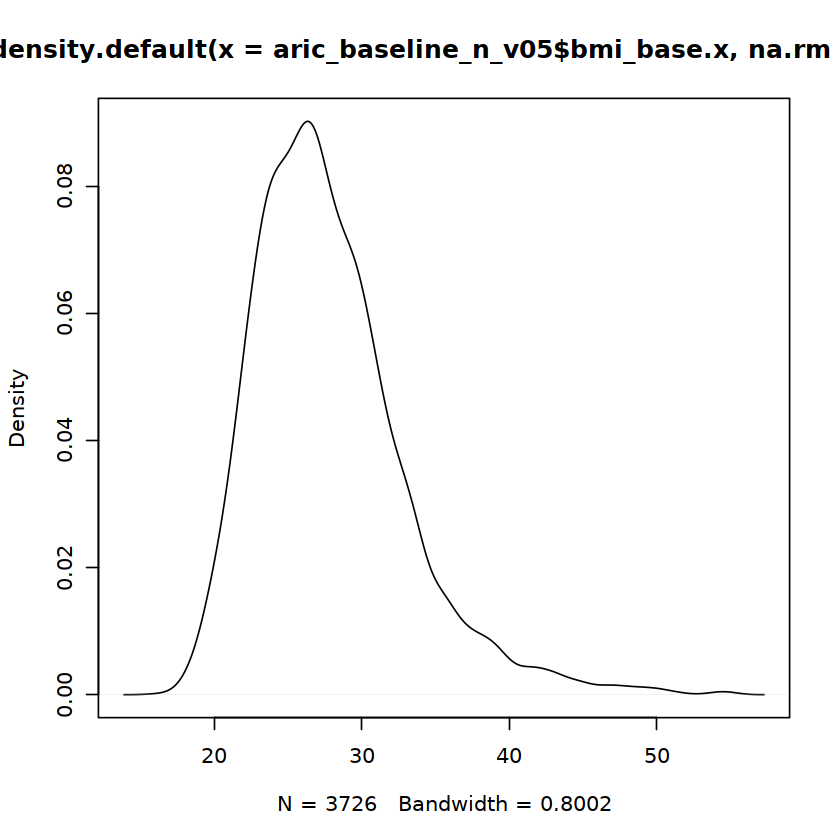

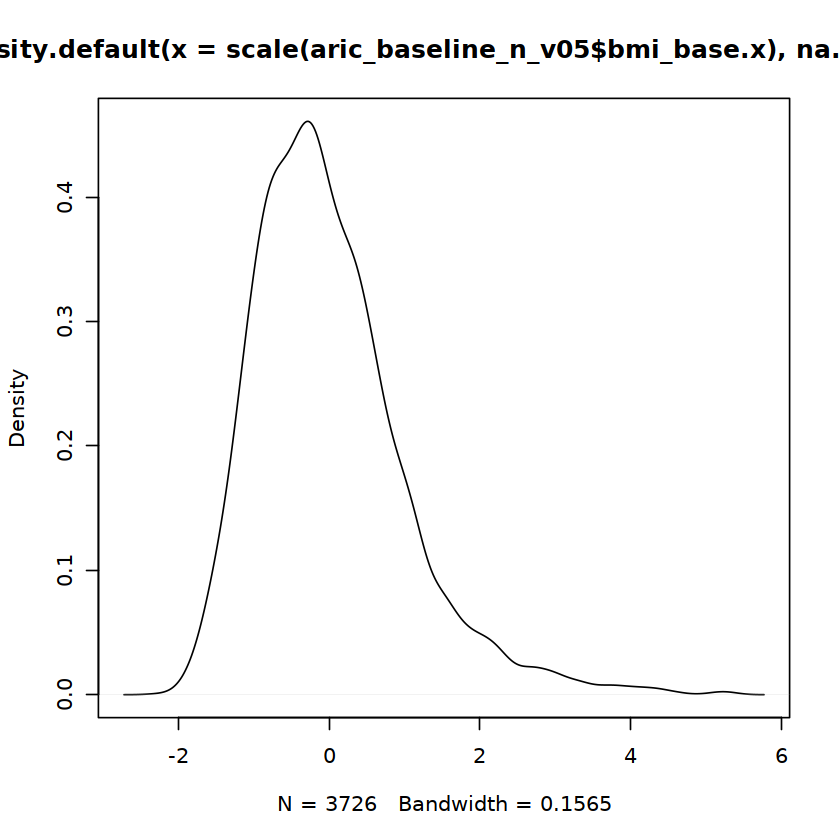

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-2.2497 -0.7055 -0.1596  0.0000  0.5016  5.2955       4 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-2.13588 -0.72177 -0.22185 -0.07567  0.38369  4.77386        4 

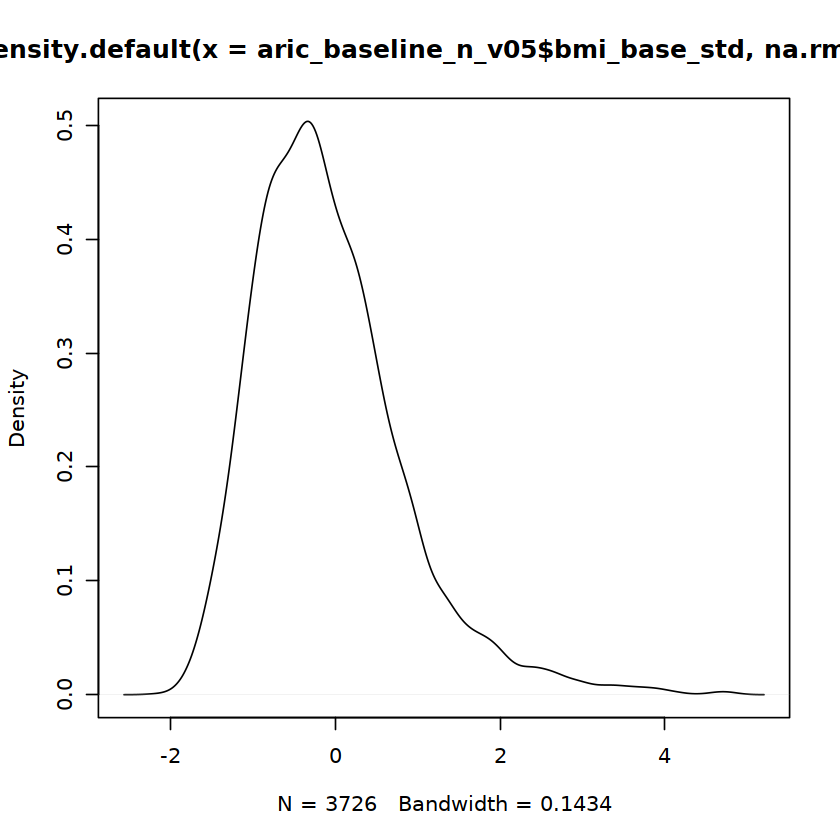

In [11]:
plot(density(aric_baseline_n_v05$bmi_base.x,na.rm = T))

plot(density(scale(aric_baseline_n_v05$bmi_base.x),na.rm = T))

plot(density(aric_baseline_n_v05$bmi_base_std,na.rm = T))

aric_baseline_n_v05$BMI_base_std <- scale(aric_baseline_n_v05$bmi_base.x)

summary(aric_baseline_n_v05$BMI_base_std)

summary(aric_baseline_n_v05$bmi_base_std)

raw


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    9.8   107.8   128.4   130.5   150.8   396.8      65 

log


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  2.282   4.680   4.855   4.835   5.016   5.983      65 

scaled


       V1          
 Min.   :-3.51357  
 1st Qu.:-0.66190  
 Median :-0.06247  
 Mean   : 0.00000  
 3rd Qu.: 0.58934  
 Max.   : 7.74800  
 NA's   :65        

[1] 1

log-scaled


       V1          
 Min.   :-9.11721  
 1st Qu.:-0.55287  
 Median : 0.07171  
 Mean   : 0.00000  
 3rd Qu.: 0.64604  
 Max.   : 4.10161  
 NA's   :65        

[1] 1

raw
scaled


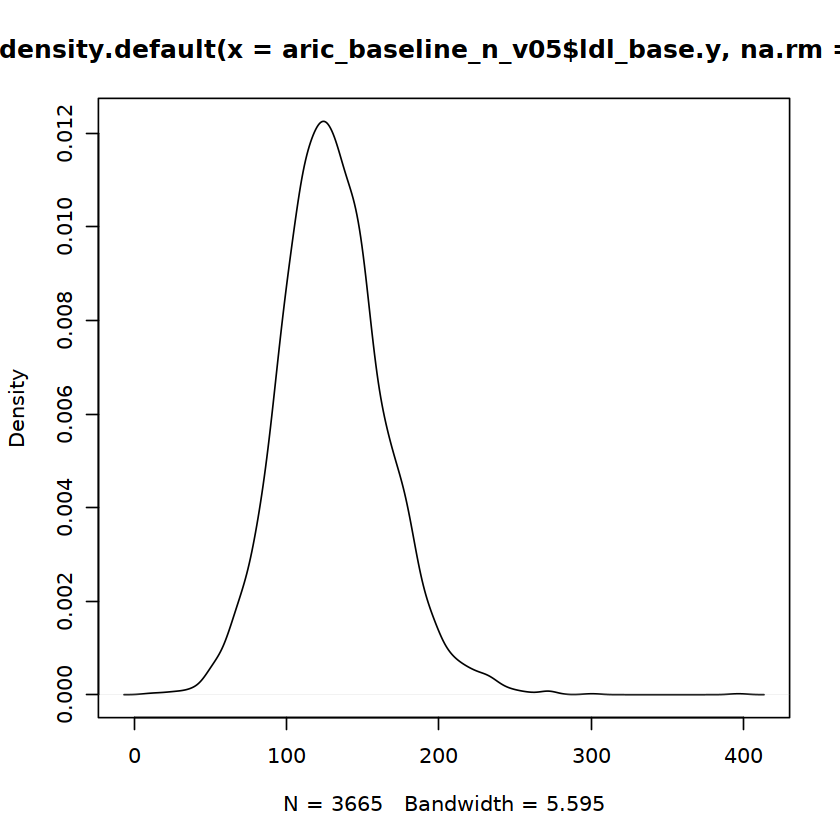

log


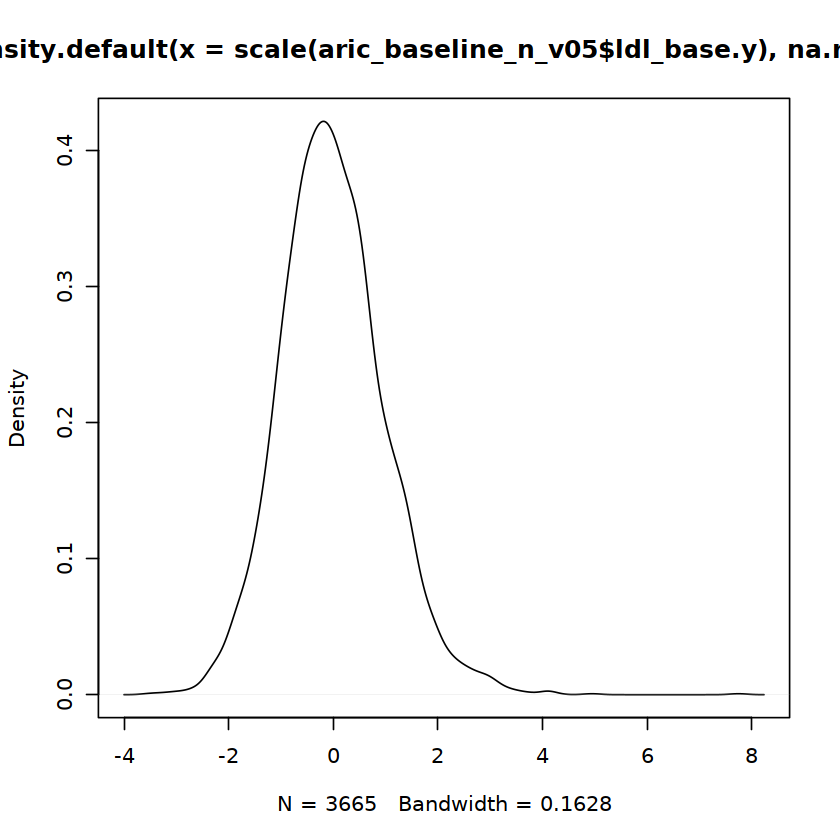

log-scaled


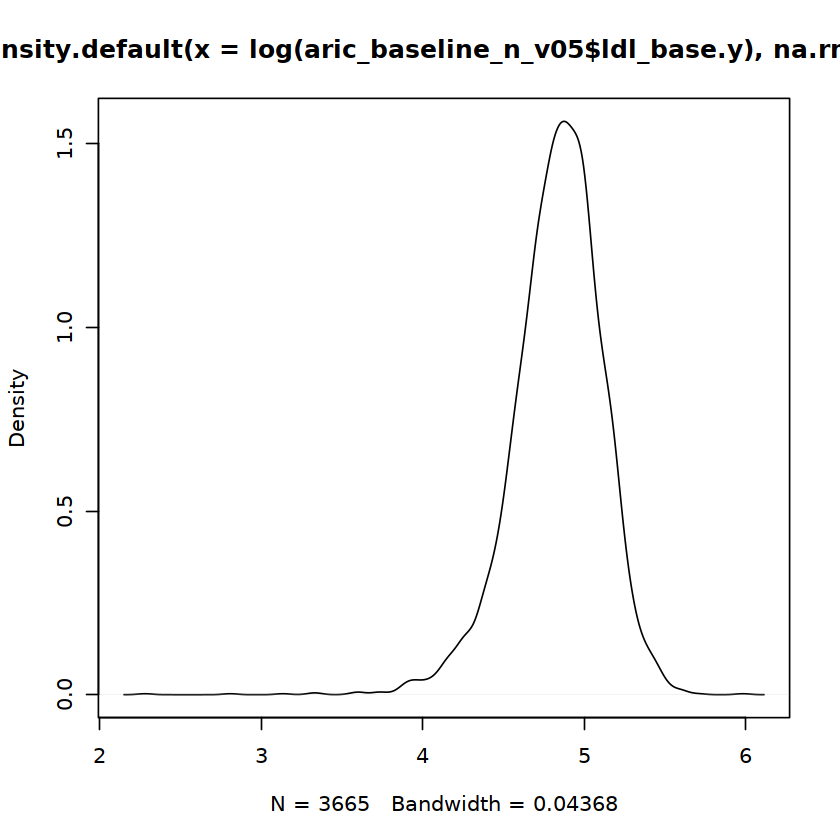

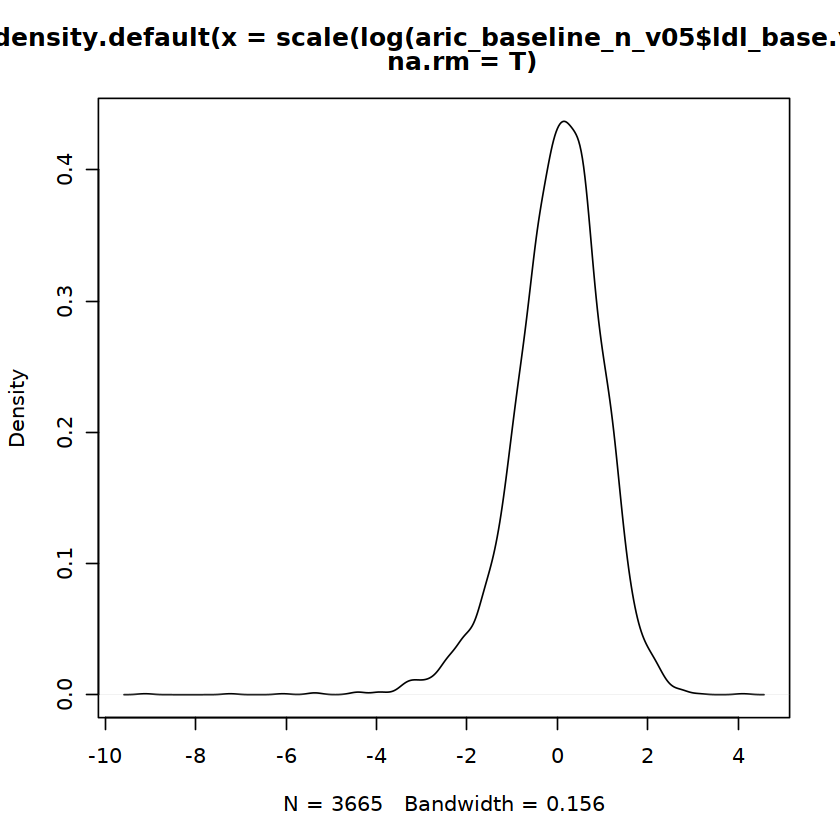

In [17]:
## LDL mg/dl
cat("raw\n")
summary(aric_baseline_n_v05$ldl_base.y)
cat("log\n")
summary((log(aric_baseline_n_v05$ldl_base.y)))


cat("scaled\n")
summary(scale(aric_baseline_n_v05$ldl_base.y))
sd(scale(aric_baseline_n_v05$ldl_base.y), na.rm = T)

cat("log-scaled\n")
summary(scale(log(aric_baseline_n_v05$ldl_base.y)))
sd(scale(log(aric_baseline_n_v05$ldl_base.y)), na.rm = T)
 
   cat("raw\n")     
plot(density(aric_baseline_n_v05$ldl_base.y,na.rm = T))

cat("scaled\n")
plot(density(scale(aric_baseline_n_v05$ldl_base.y),na.rm = T))

cat("log\n")
plot(density(log(aric_baseline_n_v05$ldl_base.y),na.rm = T))

cat("log-scaled\n")
plot(density(scale(log(aric_baseline_n_v05$ldl_base.y)),na.rm = T))

## Scaling

aric_baseline_n_v05$ldl_base.y_logStd <- scale(log(aric_baseline_n_v05$ldl_base.y))


aric_baseline_n_v05$ldl_base.y_std <- scale(aric_baseline_n_v05$ldl_base.y)


raw


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   40.00   50.00   52.04   62.00  128.00      14 

log


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.609   3.689   3.912   3.901   4.127   4.852      14 

scaled


       V1         
 Min.   :-2.7901  
 1st Qu.:-0.7139  
 Median :-0.1207  
 Mean   : 0.0000  
 3rd Qu.: 0.5911  
 Max.   : 4.5061  
 NA's   :14       

log-scaled


       V1          
 Min.   :-7.13677  
 1st Qu.:-0.66060  
 Median : 0.03435  
 Mean   : 0.00000  
 3rd Qu.: 0.70429  
 Max.   : 2.96189  
 NA's   :14        

raw
scaled


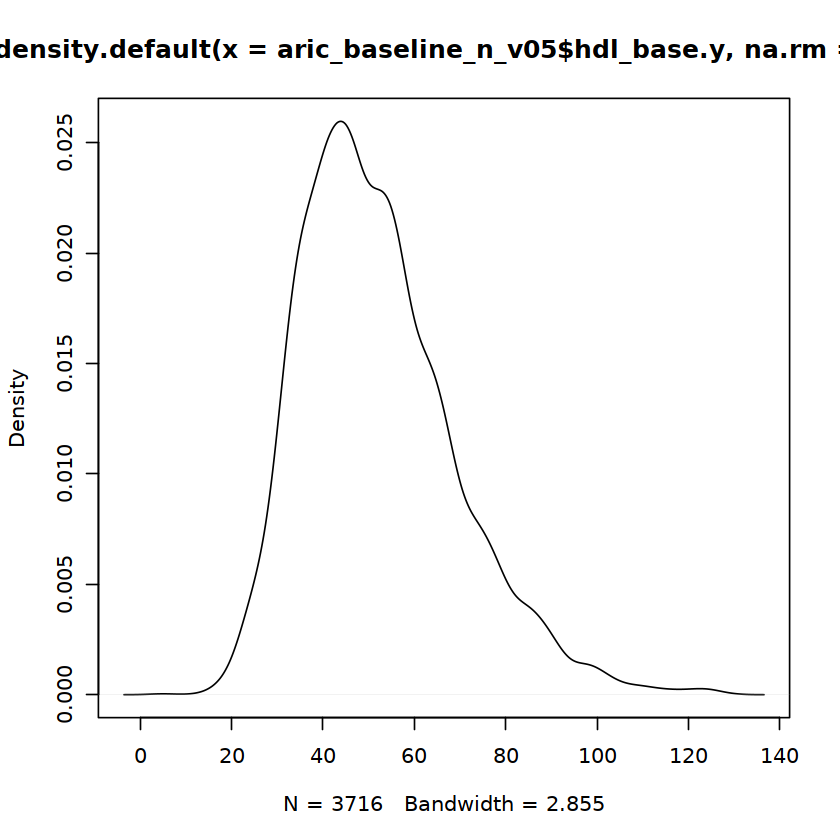

log


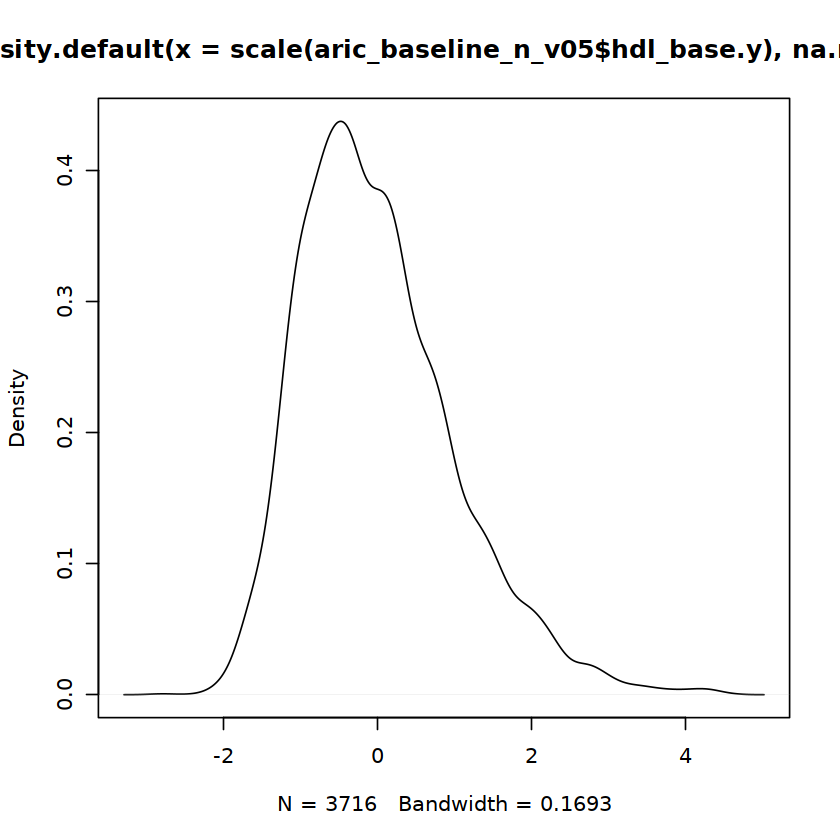

log-scaled


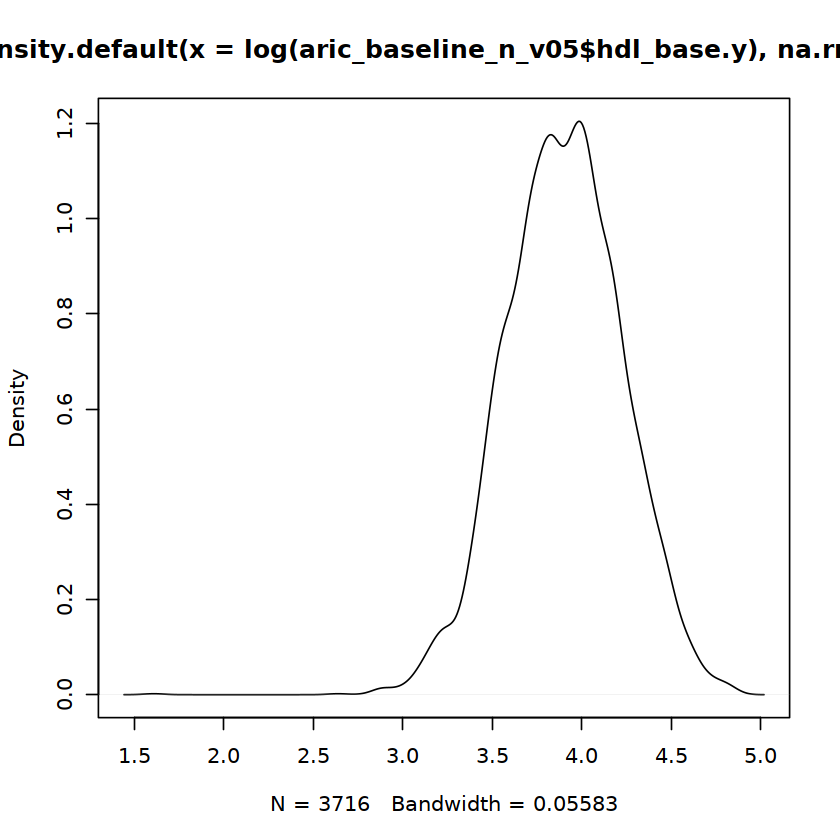

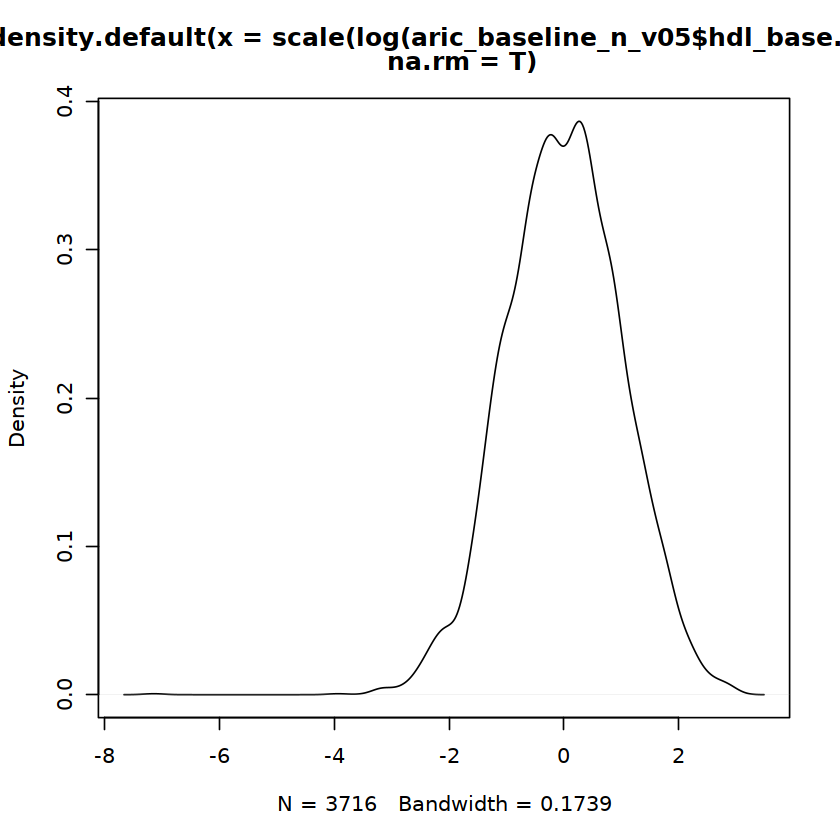

In [18]:
## hDL mg/dl
cat("raw\n")
summary(aric_baseline_n_v05$hdl_base.y)

cat("log\n")
summary((log(aric_baseline_n_v05$hdl_base.y)))

cat("scaled\n")
summary(scale(aric_baseline_n_v05$hdl_base.y))

cat("log-scaled\n")
summary(scale(log(aric_baseline_n_v05$hdl_base.y)))
  
cat("raw\n")     
plot(density(aric_baseline_n_v05$hdl_base.y,na.rm = T))

cat("scaled\n")
plot(density(scale(aric_baseline_n_v05$hdl_base.y),na.rm = T))

cat("log\n")
plot(density(log(aric_baseline_n_v05$hdl_base.y),na.rm = T))

cat("log-scaled\n")
plot(density(scale(log(aric_baseline_n_v05$hdl_base.y)),na.rm = T))


## Scaling

aric_baseline_n_v05$hdl_base.y_logStd <- scale(log(aric_baseline_n_v05$hdl_base.y))


aric_baseline_n_v05$hdl_base.y_std <- scale(aric_baseline_n_v05$hdl_base.y)


In this code, the inverse_rank_normalize function takes a vector x as input and performs inverse rank normalization on it. It first calculates the ranks of the values in the vector using the rank function. Then, it normalizes the ranks to the range [0, 1] by subtracting 1 from each rank and dividing by n - 1, where n is the length of the vector. Finally, it applies the inverse normal distribution function (qnorm) to the normalized values to obtain the inverse normalized values.

In [2]:
## corrected GPT version for missing data
inverse_rank_normalize <- function(x) {
  n <- sum(!is.na(x))
  ranks <- rank(x, na.last = "keep")
  normalized_values <- (ranks - 0.5) / n 
  inverse_normalized_values <- qnorm(normalized_values)
  return(inverse_normalized_values)
}

### 
  ### source:  https://www.biostars.org/p/80597/ and the supplement of Yang et al. Nature 2012.
INT_yang2012 <- function(x){
  y<-qnorm((rank(x,na.last='keep')-0.5)/sum(!is.na(x)))
  return(y)
}

Warning message in bplt(at[i], wid = width[i], stats = z$stats[, i], out = z$out[z$group == :
"Outliers (Inf, -Inf) in boxplot 1 are not drawn"


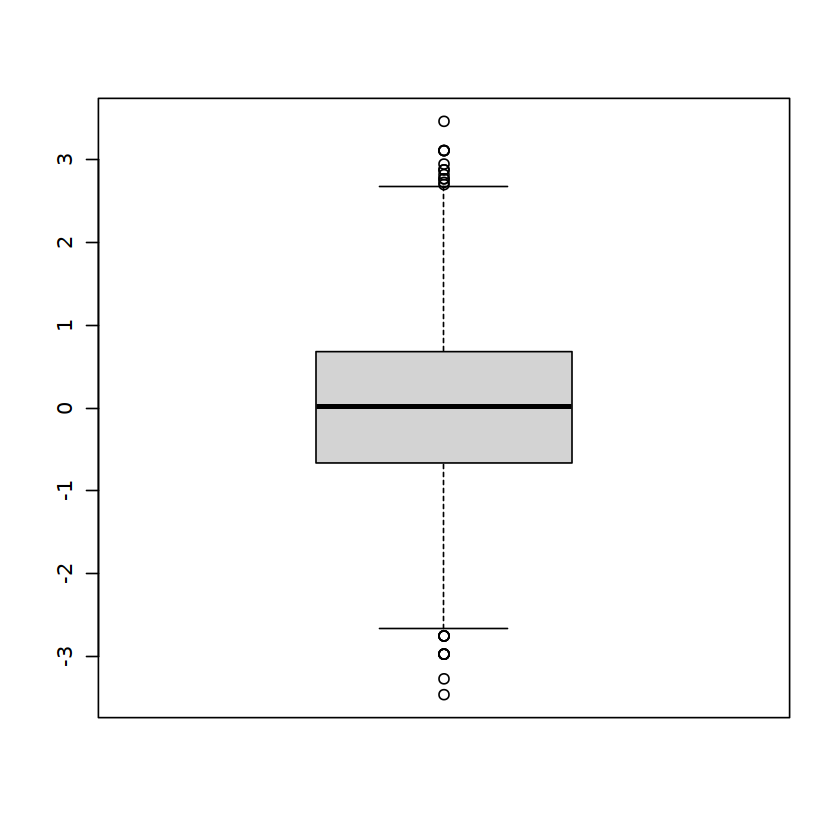

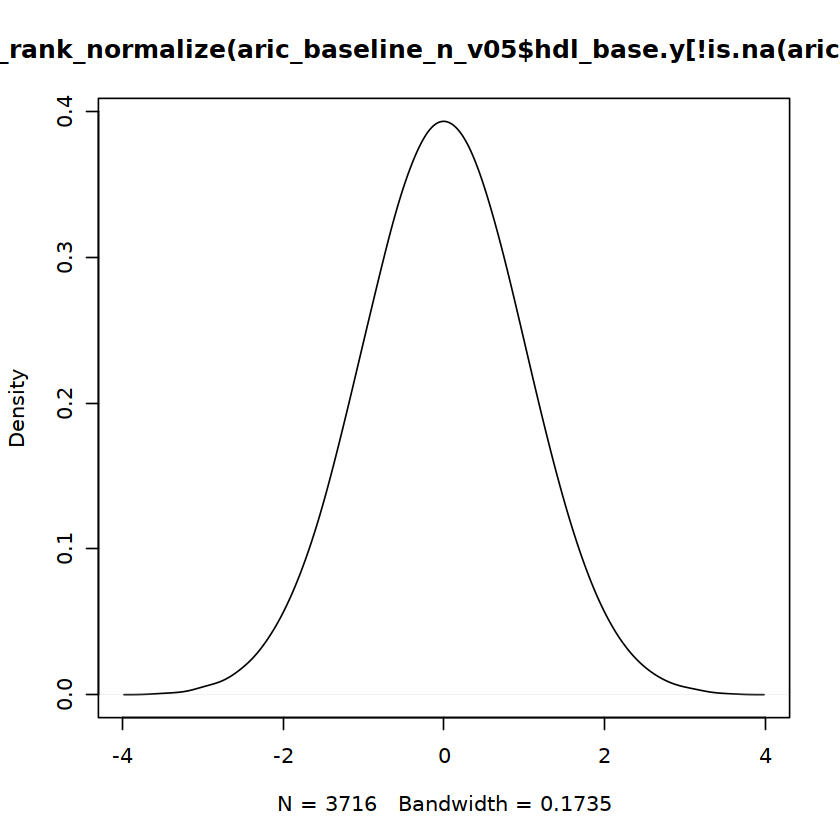

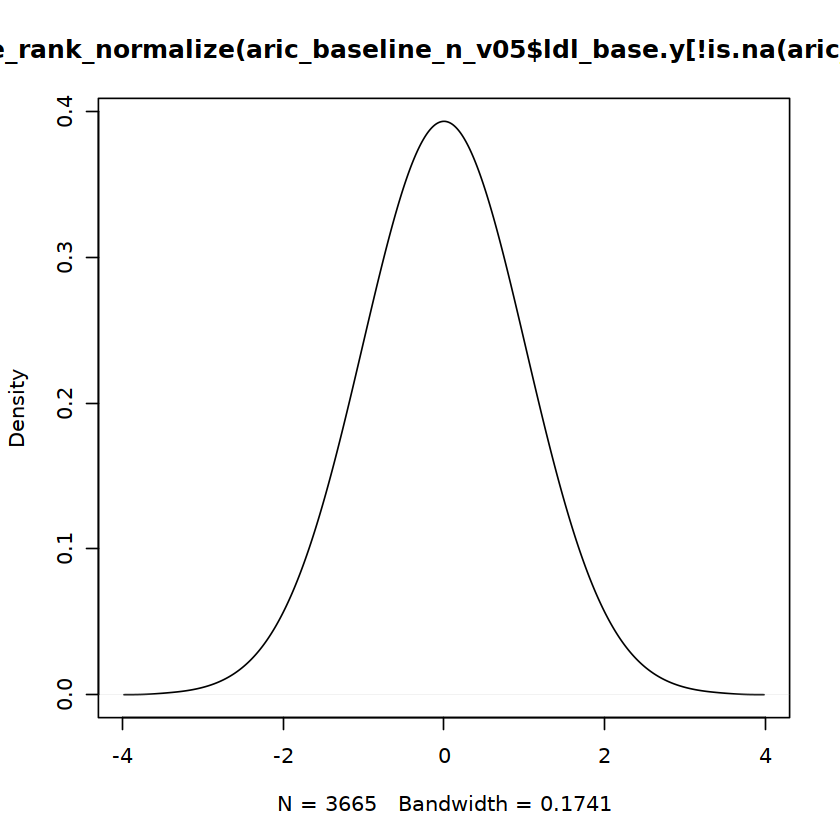

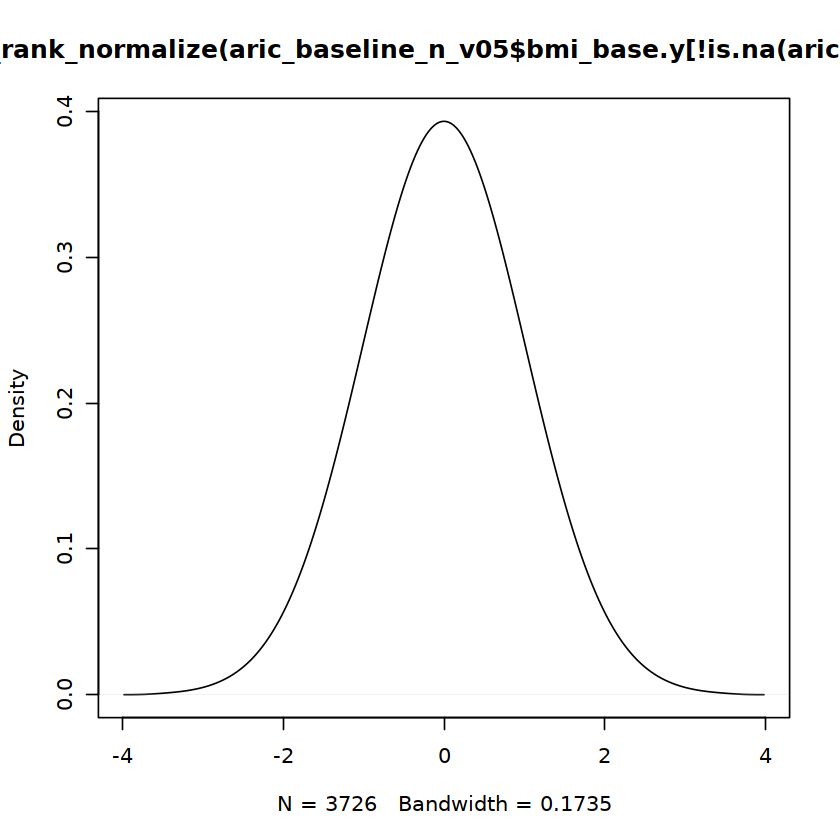

In [37]:
boxplot(inverse_rank_normalize(aric_baseline_n_v05$hdl_base.y[!is.na(aric_baseline_n_v05$hdl_base.y)]))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$hdl_base.y[!is.na(aric_baseline_n_v05$hdl_base.y)])))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$ldl_base.y[!is.na(aric_baseline_n_v05$ldl_base.y)])))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$bmi_base.y[!is.na(aric_baseline_n_v05$bmi_base.y)])))

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    -Inf -0.66628  0.01042           0.67175      Inf 

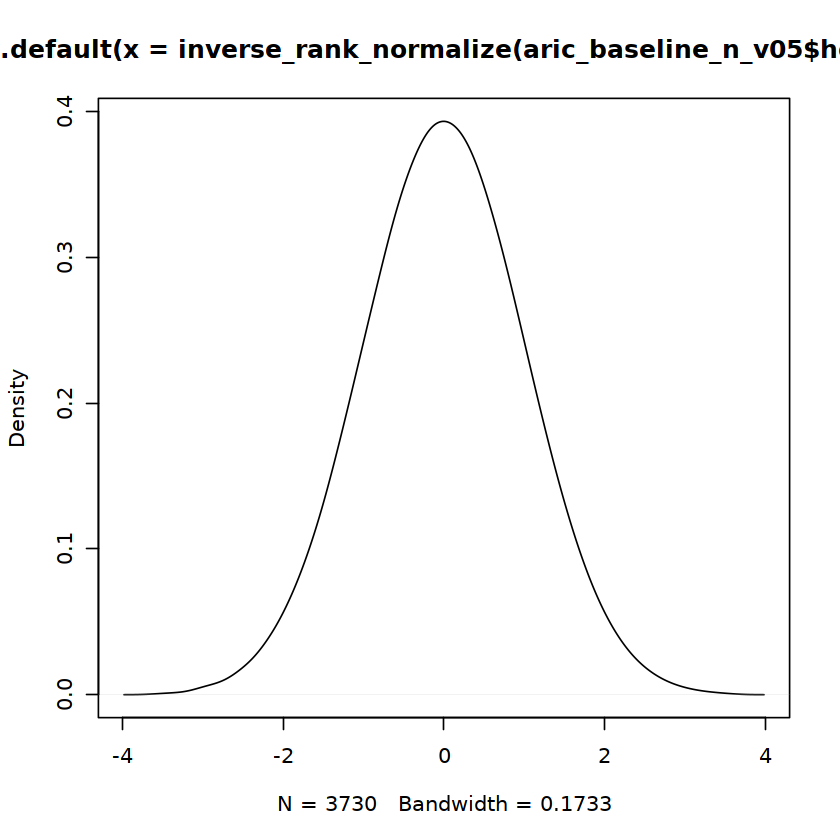

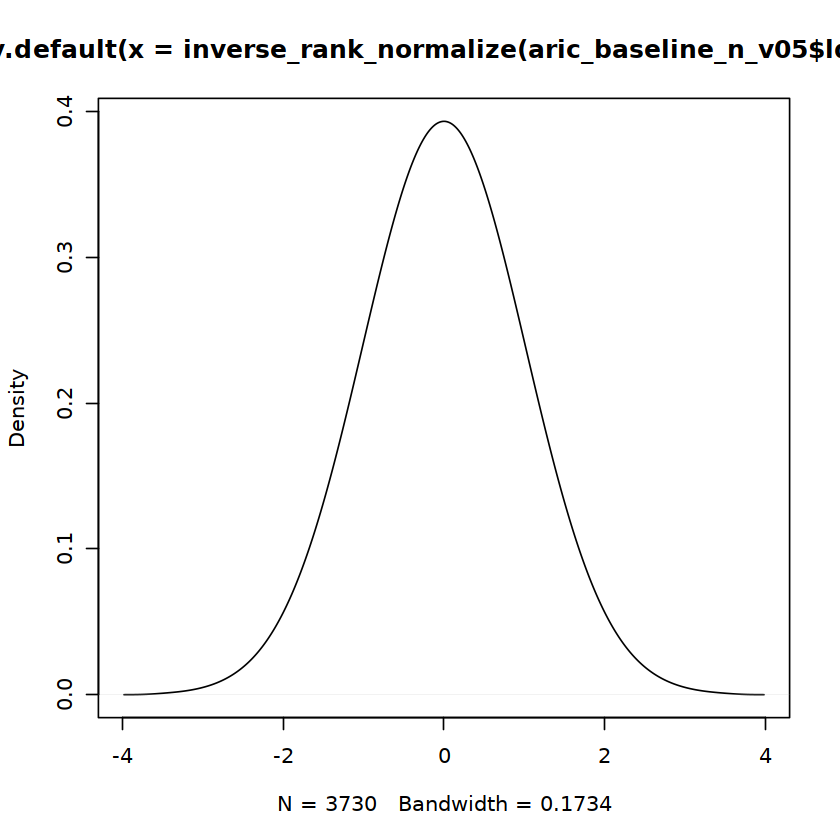

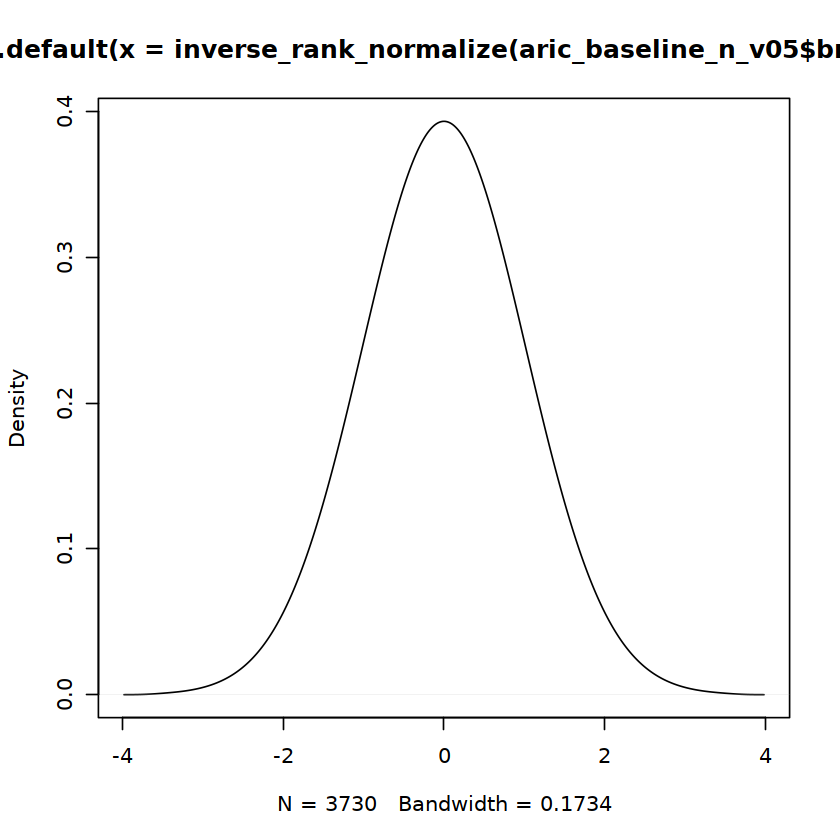

In [33]:

summary(inverse_rank_normalize(aric_baseline_n_v05$hdl_base.y))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$hdl_base.y)))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$ldl_base.y)))

plot(density(inverse_rank_normalize(aric_baseline_n_v05$bmi_base.y )))

In [41]:
# INT: The rank-based inverse normal transformation (INT) 
aric_baseline_n_v05$ldl_base.y_INT <- (inverse_rank_normalize(aric_baseline_n_v05$ldl_base.y))

aric_baseline_n_v05$hdl_base.y_INT <- (inverse_rank_normalize(aric_baseline_n_v05$hdl_base.y))

aric_baseline_n_v05$bmi_base.y_INT <- (inverse_rank_normalize(aric_baseline_n_v05$bmi_base.y))



In [48]:
summary(aric_baseline_n_v05 %>% 
                        glm(incident_CH ~ 
                            ever_smoke + bami_base + age_base.x + Sex + race_BW +  
                            ldl_base.y_logStd + hdl_base.y_logStd + 
                            dm_126_base.x + htn_5_base.x + chd_is_base +  
                            chol_med_base.x + Center + v2_vs_other, 
                            data = ., family="binomial"))

ERROR: Error in eval(predvars, data, env): object 'bami_base' not found


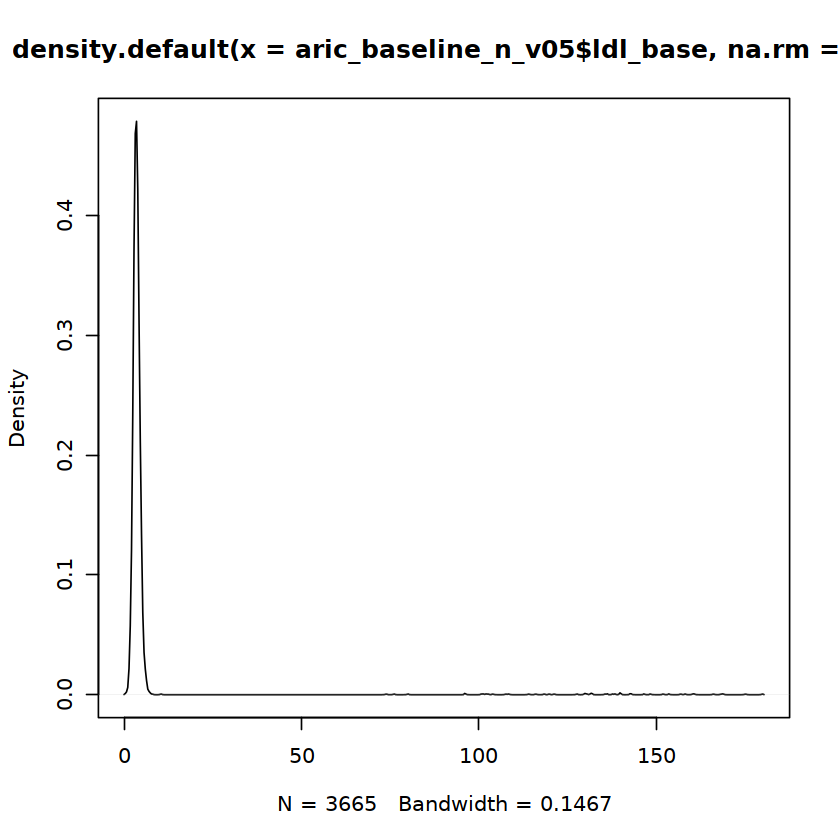

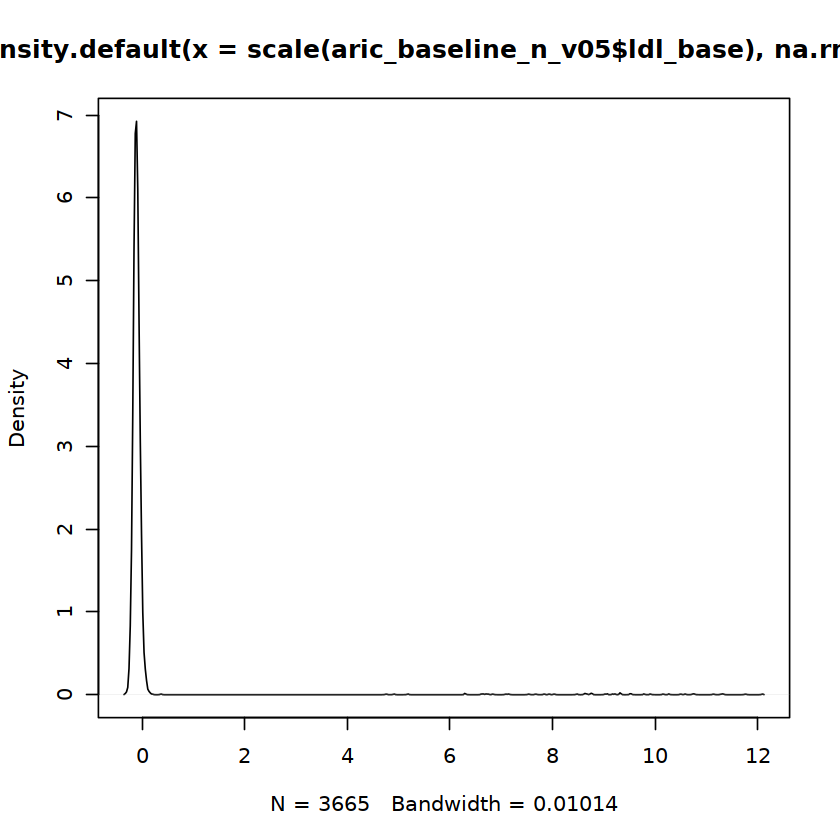

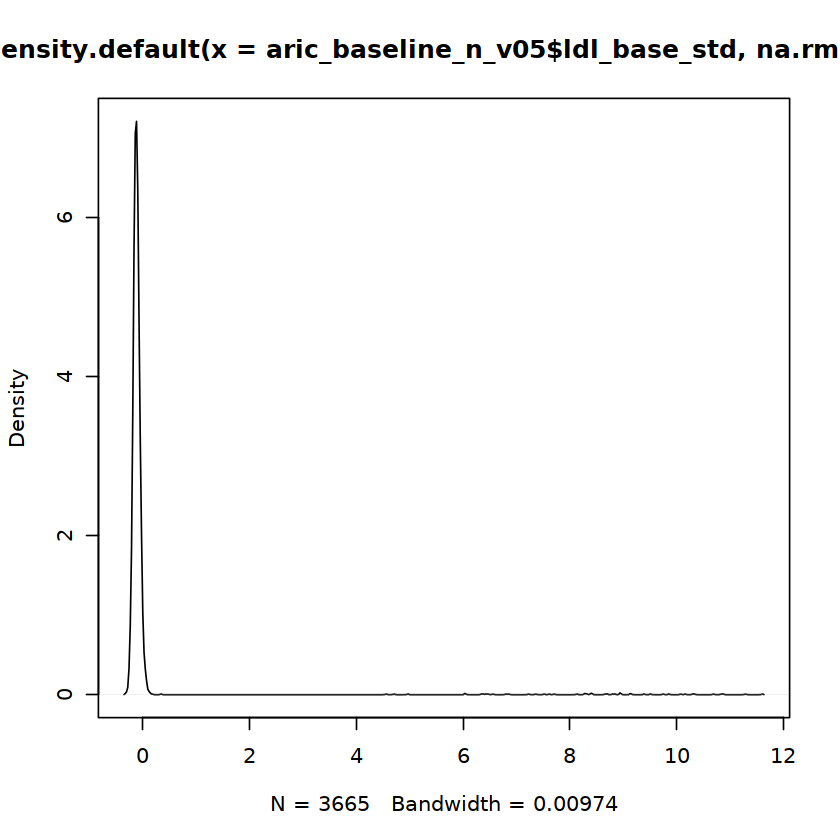

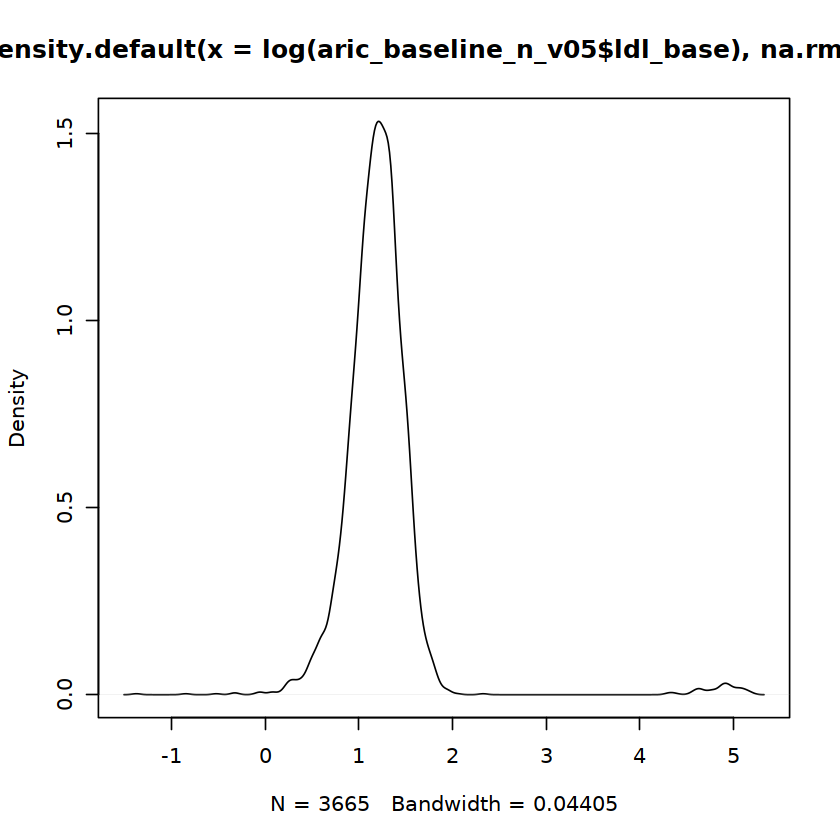

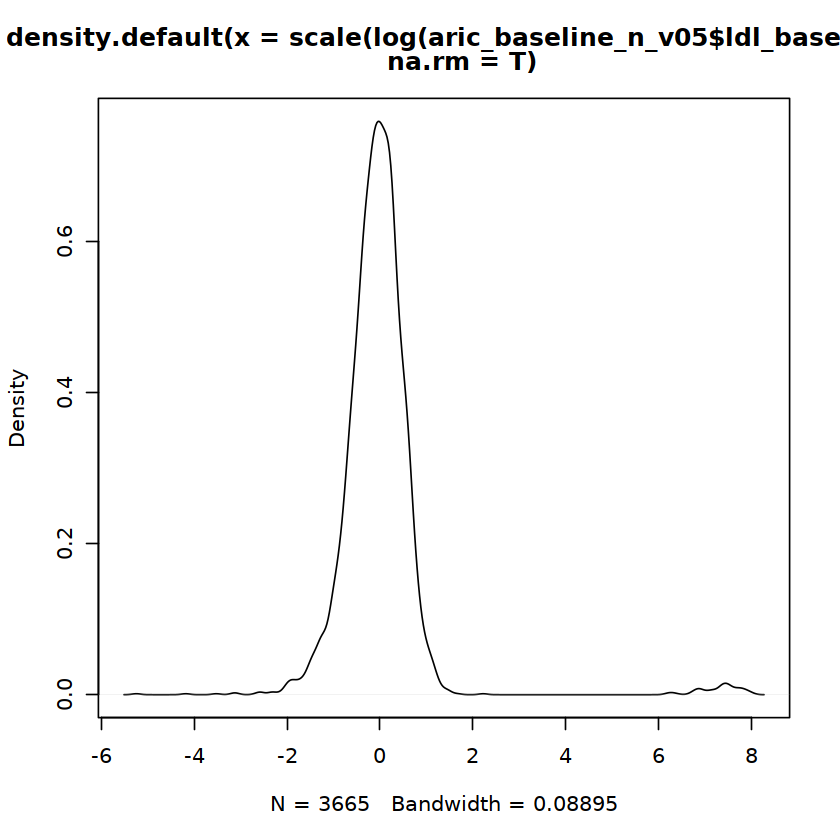

In [5]:
## LDL
plot(density(aric_baseline_n_v05$ldl_base,na.rm = T))

plot(density(scale(aric_baseline_n_v05$ldl_base),na.rm = T))

plot(density(aric_baseline_n_v05$ldl_base_std,na.rm = T))

plot(density(log(aric_baseline_n_v05$ldl_base),na.rm = T))

plot(density(scale(log(aric_baseline_n_v05$ldl_base)),na.rm = T))

aric_baseline_n_v05$ldl_base_logStd <- scale(log(aric_baseline_n_v05$ldl_base))


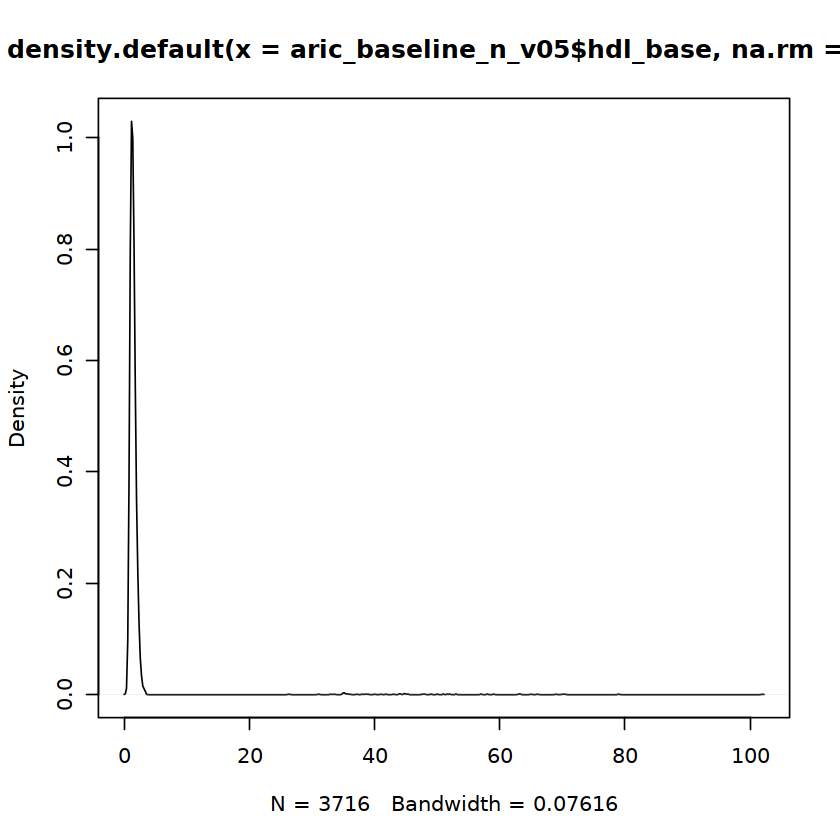

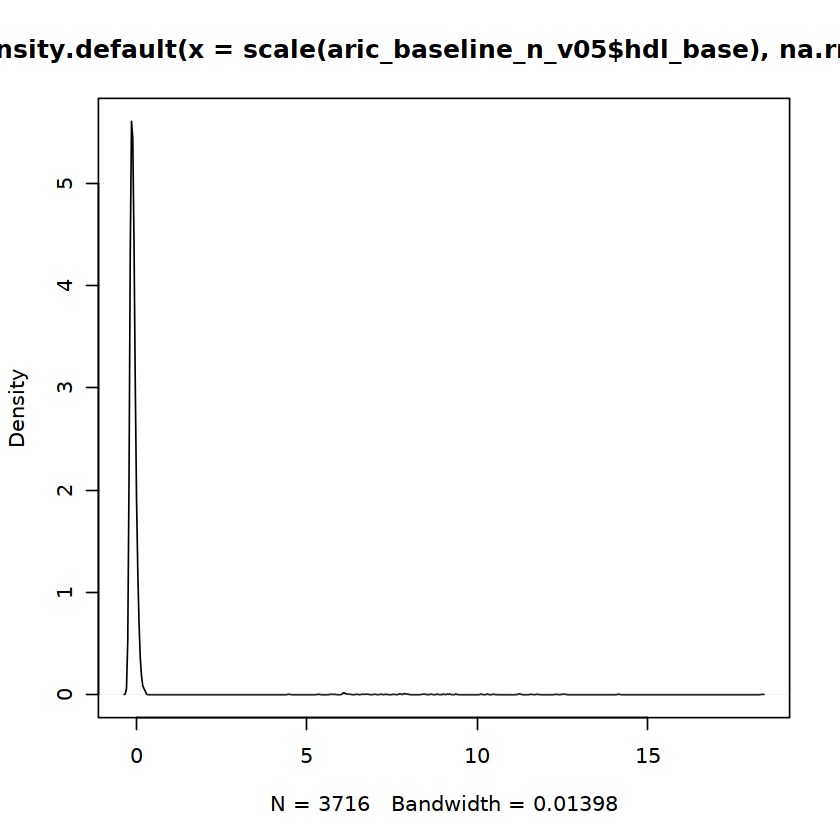

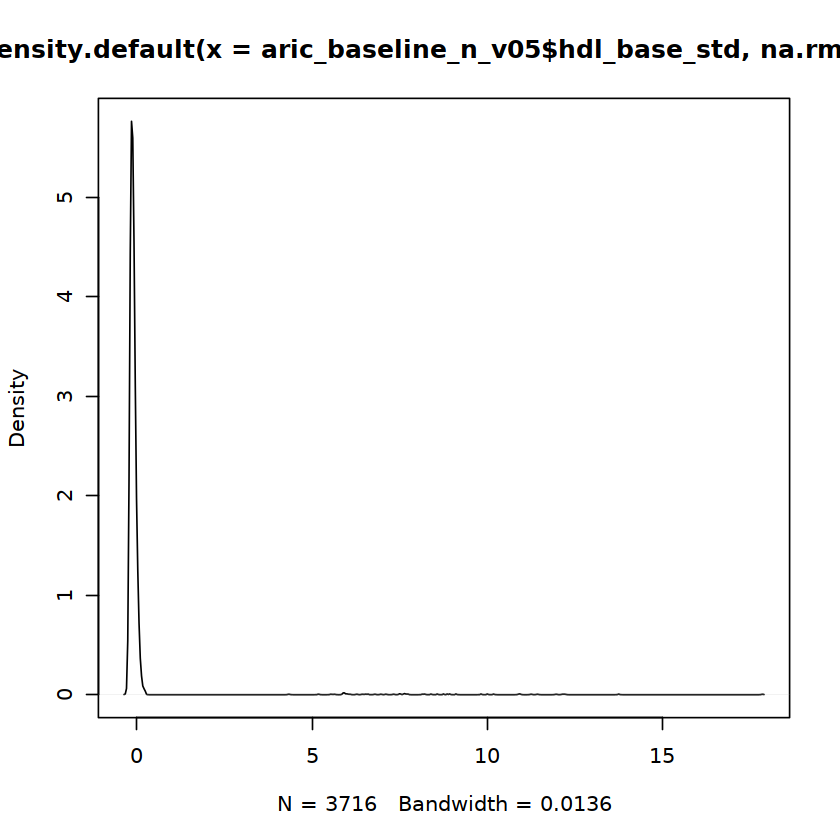

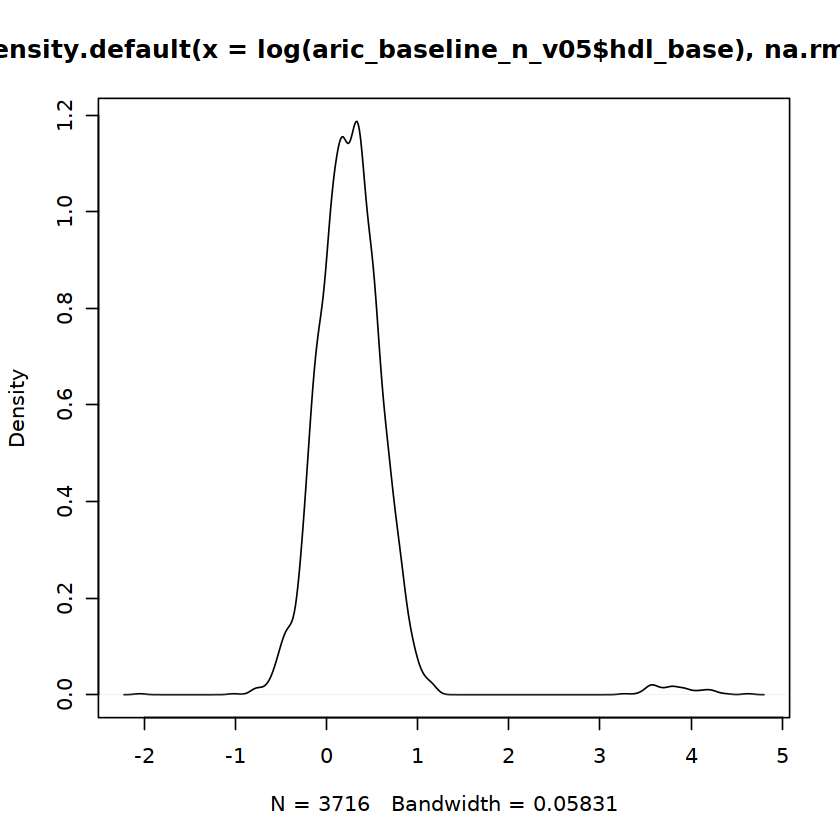

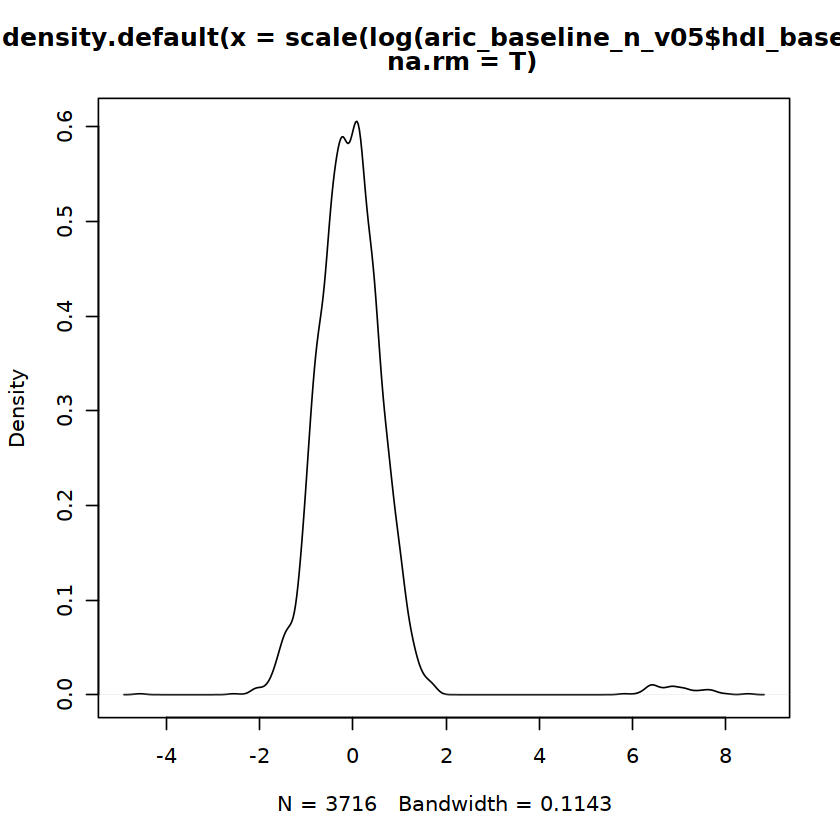

In [6]:
plot(density(aric_baseline_n_v05$hdl_base,na.rm = T))

plot(density(scale(aric_baseline_n_v05$hdl_base),na.rm = T))

plot(density(aric_baseline_n_v05$hdl_base_std,na.rm = T))

plot(density(log(aric_baseline_n_v05$hdl_base),na.rm = T))

plot(density(scale(log(aric_baseline_n_v05$hdl_base)),na.rm = T))

aric_baseline_n_v05$hdl_base_logStd <- scale(log(aric_baseline_n_v05$hdl_base))


## Un-adjusted model: GLM

In [67]:
cat(gsub(pattern = ", ", replacement = ",", x = toString(
  c("Dataset","Outcome", "Exposure","Beta", "SE", "t-stat", "P"))),
  file = "final_glm.adj_vs_unadj.incident_chip.2023May24.csv", append = F, fill = T)

In [15]:
# cat(gsub(pattern =", ", replacement = ",", x= toString(c("Unadjusted", summary(aric_baseline_n_v05 %>% filter(!is.na(age_base) & !is.na(incident_CH)) %>%
  #                      glm(incident_CH ~  age_base, data = ., family = "binomial"))$coefficients[2,1:4]))))

Unadjusted,0.0335706423326323,0.00739252459672974,4.54116072166782,5.59453607500203e-06

In [68]:
# exclude: too many missing value (637) gluc_base_std"
# exposures <- c("age_base",  "bmi_base_std",   
 #              "hdl_base_std", "ldl_base_std",
  #             "tg_base_std","nonHDL_base_std", 
   #            "Sex", "race_BW", "ever_smoke", 
    #           "dm_126_base", "htn_5_base", "ascvd_base")
exposures <- c("age_base",  "BMI_base_std",   
               "hdl_base_logStd", "ldl_base_logStd",
               "Sex", "race_BW", "ever_smoke", 
               "dm_126_base", "htn_5_base", 
               "chd_is_base")

ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")

##
for(i in exposures){
  
  for (j in ch_phenotype){
    cat("outcome:",j," exposure:", i,"\n")
    # remove NA
    model1 <- summary(aric_baseline_n_v05 %>% filter(!is.na(get(i)) & !is.na(get(j))) %>%
                        glm(get(j) ~  get(i), 
                            data = ., family = "binomial"))
      
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("Unadjusted", paste0(j), paste0(i), 
        model1$coefficients[2,1:4]) ) ), 
      file = "final_glm.adj_vs_unadj.incident_chip.2023May24.csv", append = T, fill = T)
    
  }
}

outcome: incident_CH  exposure: age_base 
outcome: incident_DNMT3A  exposure: age_base 
outcome: incident_TET2  exposure: age_base 
outcome: incident_ASXL1  exposure: age_base 
outcome: incident_SF  exposure: age_base 
outcome: incident_DDR  exposure: age_base 
outcome: incident_CH  exposure: BMI_base_std 
outcome: incident_DNMT3A  exposure: BMI_base_std 
outcome: incident_TET2  exposure: BMI_base_std 
outcome: incident_ASXL1  exposure: BMI_base_std 
outcome: incident_SF  exposure: BMI_base_std 
outcome: incident_DDR  exposure: BMI_base_std 
outcome: incident_CH  exposure: hdl_base_logStd 
outcome: incident_DNMT3A  exposure: hdl_base_logStd 
outcome: incident_TET2  exposure: hdl_base_logStd 
outcome: incident_ASXL1  exposure: hdl_base_logStd 
outcome: incident_SF  exposure: hdl_base_logStd 
outcome: incident_DDR  exposure: hdl_base_logStd 
outcome: incident_CH  exposure: ldl_base_logStd 
outcome: incident_DNMT3A  exposure: ldl_base_logStd 
outcome: incident_TET2  exposure: ldl_base_log

## Adjusted model:  
### all exposures: 
adjusted for age, Sex, Race, Smoking, bmi, ldl-c, hdl-c, t2d, htn, ascvd, chol_med, batch(visit,center)

In [69]:
# Outcomes
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")

# Exposures
test_exposures <- c("age_base", "Sex", "race_BW", 
                    "ever_smoke", "BMI_base_std", 
                    "ldl_base_logStd", "hdl_base_logStd", 
                    "dm_126_base", "htn_5_base", 
                    "chd_is_base")

for (j in ch_phenotype){
  for (k in 1:length(test_exposures)) {
      
    cat("outcome:",j," exposure:", test_exposures[k],"\n")
      
    model3 <- summary(aric_baseline_n_v05 %>% 
                        filter(!is.na(get(j))) %>% 
                        glm(get(j) ~ 
                            age_base + Sex + race_BW + 
                            ever_smoke + BMI_base_std + 
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))
      
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("Adjusted", paste0(j), paste0(test_exposures[k]),
        model3$coefficients[k+1,1:4]) ) ),
      file = "final_glm.adj_vs_unadj.incident_chip.2023May24.csv", 
      append = T, fill = T)
      
  }
}


outcome: incident_CH  exposure: age_base 
outcome: incident_CH  exposure: Sex 
outcome: incident_CH  exposure: race_BW 
outcome: incident_CH  exposure: ever_smoke 
outcome: incident_CH  exposure: BMI_base_std 
outcome: incident_CH  exposure: ldl_base_logStd 
outcome: incident_CH  exposure: hdl_base_logStd 
outcome: incident_CH  exposure: dm_126_base 
outcome: incident_CH  exposure: htn_5_base 
outcome: incident_CH  exposure: chd_is_base 
outcome: incident_DNMT3A  exposure: age_base 
outcome: incident_DNMT3A  exposure: Sex 
outcome: incident_DNMT3A  exposure: race_BW 
outcome: incident_DNMT3A  exposure: ever_smoke 
outcome: incident_DNMT3A  exposure: BMI_base_std 
outcome: incident_DNMT3A  exposure: ldl_base_logStd 
outcome: incident_DNMT3A  exposure: hdl_base_logStd 
outcome: incident_DNMT3A  exposure: dm_126_base 
outcome: incident_DNMT3A  exposure: htn_5_base 
outcome: incident_DNMT3A  exposure: chd_is_base 
outcome: incident_TET2  exposure: age_base 
outcome: incident_TET2  exposure

### Forest plot

In [29]:
##############################
#### Forest plot
##############################
library(data.table) # version 1.14.6
library(meta) # version 6.2-1
library(grid) # version 4.2.2
library(scales) # version 1.2.1
##############################

Loading 'meta' package (version 4.18-2).
Type 'help(meta)' for a brief overview.



In [70]:
# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/epi/")
    # load cohph summary
glm_dat <- fread("final_glm.adj_vs_unadj.incident_chip.2023May24.csv", header = T)
table(glm_dat$Dataset)
table(glm_dat$Exposure)
table(glm_dat$Outcome)


  Adjusted Unadjusted 
        60         60 


   BMI_base_std             Sex        age_base     chd_is_base     dm_126_base 
             12              12              12              12              12 
     ever_smoke hdl_base_logStd      htn_5_base ldl_base_logStd         race_BW 
             12              12              12              12              12 


 incident_ASXL1     incident_CH    incident_DDR incident_DNMT3A     incident_SF 
             20              20              20              20              20 
  incident_TET2 
             20 

In [71]:
## Exposures
glm_dat$Exposure[glm_dat$Exposure=="age_base"] <- "Age"
glm_dat$Exposure[glm_dat$Exposure=="BMI_base_std"] <- "BMI"
# glm_dat$Exposure[glm_dat$Exposure=="ascvd_base"] <- "ASCVD"
glm_dat$Exposure[glm_dat$Exposure=="chd_is_base"] <- "ASCVD"
# glm_dat$Exposure[glm_dat$Exposure=="hf_base"] <- "Heart Failure"
# glm_dat$Exposure[glm_dat$Exposure=="chol_base_std"] <- "Total Cholesterol"
glm_dat$Exposure[glm_dat$Exposure=="dm_126_base"] <- "T2D"
glm_dat$Exposure[glm_dat$Exposure=="ever_smoke"] <- "Ever Smoker"
glm_dat$Exposure[glm_dat$Exposure=="hdl_base_logStd"] <- "HDL-C"
glm_dat$Exposure[glm_dat$Exposure=="htn_5_base"] <- "Hypertension"
glm_dat$Exposure[glm_dat$Exposure=="ldl_base_logStd"] <- "LDL-C"
# glm_dat$Exposure[glm_dat$Exposure=="nonHDL_base_std"] <- "Non-HDL-C"
glm_dat$Exposure[glm_dat$Exposure=="race_BW"] <- "European"
glm_dat$Exposure[glm_dat$Exposure=="Sex"] <- "Male Sex"
# glm_dat$Exposure[glm_dat$Exposure=="tg_base_std"] <- "Triglyceride"
table(glm_dat$Exposure)
    ## Outcome
# glm_dat$Outcome[glm_dat$Outcome=="incident_CH_or_growingClones"] <- "Incident or growing clones"
glm_dat$Outcome[glm_dat$Outcome=="incident_CH"] <- "Overall CH"
glm_dat$Outcome[glm_dat$Outcome=="incident_DNMT3A"] <- "DNMT3A"
glm_dat$Outcome[glm_dat$Outcome=="incident_TET2"] <- "TET2"
glm_dat$Outcome[glm_dat$Outcome=="incident_ASXL1"] <- "ASXL1"
# glm_dat$Outcome[glm_dat$Outcome=="incident_DTA"] <- "DTA"
glm_dat$Outcome[glm_dat$Outcome=="incident_SF"] <- "SF"
glm_dat$Outcome[glm_dat$Outcome=="incident_DDR"] <- "DDR"

table(glm_dat$Outcome)


       ASCVD          Age          BMI     European  Ever Smoker        HDL-C 
          12           12           12           12           12           12 
Hypertension        LDL-C     Male Sex          T2D 
          12           12           12           12 


     ASXL1        DDR     DNMT3A Overall CH         SF       TET2 
        20         20         20         20         20         20 

In [72]:
## 20 independent test at 5%; P< 0.05/20 = 0.0025
# cat("P threshold< 0.0025")
# 0.05/20 = 0.0025 = "2.5E-03"
# 0.05/15 = 0.0033 = "3.3E-03"
cat("P threshold< ",round(0.05/15,4))
glm_dat$sig <- ifelse(glm_dat$P<0.0033, "***","")
table(glm_dat$sig)

P threshold<  0.0033


    *** 
110  10 

In [73]:
# format 
glm_dat$P_val <- formatC(x = glm_dat$P, digits = 1,format = "E")

    # OR
glm_dat$OR <- formatC(round(exp(glm_dat$Beta),2), digits = 2, format = "f")

glm_dat$lSE <- ( glm_dat$Beta - 1.96 * glm_dat$SE)
glm_dat$uSE <- ( glm_dat$Beta + 1.96 * glm_dat$SE)

    # 95% CI
glm_dat$CI95 <- paste0("[",formatC(round(exp( glm_dat$Beta - 1.96 * glm_dat$SE),2), digits = 2, format = "f"),
                       ", ",
                       formatC(round(exp( glm_dat$Beta + 1.96 * glm_dat$SE),2), digits = 2, format = "f"), 
                       "]")
head(glm_dat)

Dataset,Outcome,Exposure,Beta,SE,t-stat,P,sig,P_val,OR,lSE,uSE,CI95
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Unadjusted,Overall CH,Age,0.033635944,0.007391752,4.5504694,5.352636e-06,***,5.4E-06,1.03,0.019148109,0.04812378,"[1.02, 1.05]"
Unadjusted,DNMT3A,Age,0.002858264,0.010833573,0.2638339,7.919079e-01,,7.9E-01,1.00,-0.018375539,0.02409207,"[0.98, 1.02]"
Unadjusted,TET2,Age,0.049077740,0.013623009,3.6025624,3.150957e-04,***,3.2E-04,1.05,0.022376643,0.07577884,"[1.02, 1.08]"
Unadjusted,ASXL1,Age,0.056265851,0.021236901,2.6494380,8.062577e-03,,8.1E-03,1.06,0.014641525,0.09789018,"[1.01, 1.10]"
Unadjusted,SF,Age,0.090536652,0.020376397,4.4432119,8.862579e-06,***,8.9E-06,1.09,0.050598913,0.13047439,"[1.05, 1.14]"
Unadjusted,DDR,Age,0.051710050,0.024268086,2.1307840,3.310694e-02,,3.3E-02,1.05,0.004144601,0.09927550,"[1.00, 1.10]"


In [74]:
### FDR
glm_dat$FDR <- p.adjust(glm_dat$P, method = "BH")
table(glm_dat$FDR<0.05)

adj.glm_dat <- subset(glm_dat, glm_dat$Dataset=="Adjusted")
adj.glm_dat$FDR <- p.adjust(adj.glm_dat$P, method = "BH")
table(adj.glm_dat$FDR<0.05)



FALSE  TRUE 
  106    14 


FALSE  TRUE 
   54     6 

In [75]:
## Adjusted
adj.glm_dat_v1 <- subset(adj.glm_dat, 
                         adj.glm_dat$Outcome %in% c("Overall CH", "DNMT3A", "TET2"))
## Sort outcome
adj.glm_dat_v1$Outcome <- ordered(adj.glm_dat_v1$Outcome, 
                           levels = c("Overall CH", 
                                      "DNMT3A", "TET2" 
                                      )) 

## exposure
adj.glm_dat_v1$Exposure <- ordered(adj.glm_dat_v1$Exposure, 
                            levels = c("Age", "Male Sex", 
                                       "European", "Ever Smoker", 
                                       "BMI", "Hypertension", 
                                       "ASCVD", "T2D", 
                                       "LDL-C", "HDL-C"))

## V2
adj.glm_dat_v2 <- subset(adj.glm_dat, 
                     adj.glm_dat$Outcome %in% c("ASXL1", "SF", "DDR"))
### V2
adj.glm_dat_v2$Outcome <- ordered(adj.glm_dat_v2$Outcome, 
                           levels = c("ASXL1", 
                                      "SF", "DDR")) 

adj.glm_dat_v2$Exposure <- ordered(adj.glm_dat_v2$Exposure, 
                            levels = c("Age", "Male Sex", 
                                       "European", "Ever Smoker", 
                                       "BMI", "Hypertension", 
                                       "ASCVD", "T2D", 
                                       "LDL-C", "HDL-C"))

In [45]:
## cox_dat_v1: CH, DNMT3A, TET2
## All adjusted
# df_plot_adj_v1 <- subset(glm_dat_v1, glm_dat_v1$Dataset=="Adjusted")
## Format metagen
b_adj_v1 <- metagen(TE = Beta,
                    lower = lSE,
                    upper = uSE,
                    studlab = Outcome,
                    subgroup=Exposure,
                    data=adj.glm_dat_v1,
                    sm="OR")
### adjusted CH, DNMT3A, TET2
pdf("final_glm.Forest_incidentCH.v1_adj.May24.pdf", width = 8, height= 12)
forest(x = b_adj_v1, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Odds Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("OR","CI95","P_val", "sig"),
       rightlabs=c("OR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()


ERROR: Error in metagen(TE = Beta, se = SE, studlab = Outcome, subgroup = Exposure, : unused argument (subgroup = Exposure)


In [ ]:
## ASXL1, SF, DDR
b_adj_v2 <- metagen(TE = Beta,
                    lower = lSE,
                    upper = uSE,
                    studlab = Outcome,
                    subgroup=Exposure,
                    data=adj.glm_dat_v2,
                    sm="OR")


pdf("final_glm.Forest_incidentCH.v2_adj.May24.pdf",
    width = 8, height= 12)
forest(x = b_adj_v2, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Odds Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("OR","CI95","P_val", "sig"),
       rightlabs=c("OR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()

## Unadjusted

In [76]:
## Unadjusted
unadj.glm_dat <- subset(glm_dat, glm_dat$Dataset=="Unadjusted")
unadj.glm_dat$FDR <- p.adjust(unadj.glm_dat$P, method = "BH")
table(unadj.glm_dat$FDR<0.05)
## Sort outcome
unadj.glm_dat$Outcome <- ordered(unadj.glm_dat$Outcome, 
                           levels = c("Overall CH", 
                                      "DNMT3A", "TET2", 
                                      "ASXL1", 
                                      "SF", "DDR")) 

## exposure
unadj.glm_dat$Exposure <- ordered(unadj.glm_dat$Exposure, 
                            levels = c("Age", "Male Sex", 
                                       "European", "Ever Smoker", 
                                       "BMI", "Hypertension", 
                                       "ASCVD", "T2D", 
                                       "LDL-C", "HDL-C"))



FALSE  TRUE 
   52     8 

In [ ]:
##### Unadjusted model
# Unadjusted
b_unadj <- metagen(TE = Beta,
                    lower = lSE,
                    upper = uSE,
                    studlab = Outcome,
                    subgroup=Exposure,
                    data=unadj.glm_dat,
                    sm="OR")


pdf("final_glm.Forest_incidentCH.unadj.May24.pdf",
    width = 8, height= 18)
forest(x = b_unadj, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Odds Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("OR","CI95","P_val", "sig"),
       rightlabs=c("OR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()

### Categorical Exposures: BMI and Smoking 

#### BMI cat

In [46]:
table(aric_baseline_n_v05$BMI_cat)
str(aric_baseline_n_v05$BMI_cat)
aric_baseline_n_v05$BMI_cat <- factor(aric_baseline_n_v05$BMI_cat, levels = c("<=25", "25-30", ">30"))


      25-30  <=25   >30 
    4  1525  1184  1017 

 chr [1:3730] "25-30" "<=25" "25-30" "25-30" ">30" "<=25" "25-30" "25-30" ...


#### Smoking Cat

In [41]:
table(aric_baseline_n_v05$cig_base)


   1    2    3 
 556 1448 1717 

In [10]:
  # smoking: never=3, former=2, current=1 
# aric_baseline_n_v05$cig_base_fact <- factor(aric_baseline_n_v05$cig_base, 
  #                                          levels = c(3,2,1))

aric_baseline_n_v05$Smoking_cat <- ifelse(aric_baseline_n_v05$cig_base==1,"Current smoker", 
                                          ifelse(aric_baseline_n_v05$cig_base==2, "Former smoker",
                                                 ifelse(aric_baseline_n_v05$cig_base==3,"Never smoker", NA))) 
table(aric_baseline_n_v05$Smoking_cat, exclude = NULL)

aric_baseline_n_v05$Smoking_cat_notordered <- factor(aric_baseline_n_v05$Smoking_cat, 
                                            levels = c("Never smoker", "Former smoker", "Current smoker"), 
                                          ordered =F)

# aric_baseline_n_v05$Smoking_cat_ordered <- factor(aric_baseline_n_v05$Smoking_cat, 
  #                                          levels = c("Never smoker", "Former smoker", "Current smoker"), 
   #                                       ordered =T)


Current smoker  Former smoker   Never smoker           <NA> 
           556           1448           1717              9 

In [55]:
summary(aric_baseline_n_v05 %>% 
                        glm(incident_ASXL1 ~ 
                            Smoking_cat_notordered, 
                            data = ., family="binomial"))

summary(aric_baseline_n_v05 %>% 
                        glm(incident_ASXL1 ~ 
                            Smoking_cat_notordered + BMI_cat + age_base + Sex + race_BW +  
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))$coefficients[2:5,1:4]


Call:
glm(formula = incident_ASXL1 ~ Smoking_cat_notordered, family = "binomial", 
    data = .)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.1999  -0.1904  -0.1904  -0.1813   2.8692  

Coefficients:
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                          -4.09969    0.19054 -21.516   <2e-16 ***
Smoking_cat_notorderedFormer smoker   0.09796    0.27472   0.357    0.721    
Smoking_cat_notorderedCurrent smoker  0.19680    0.35924   0.548    0.584    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 655.01  on 3720  degrees of freedom
Residual deviance: 654.69  on 3718  degrees of freedom
  (9 observations deleted due to missingness)
AIC: 660.69

Number of Fisher Scoring iterations: 7


,Estimate,Std. Error,z value,Pr(>|z|)
Smoking_cat_notorderedFormer smoker,-0.1289578,0.2934419,-0.4394664,0.66032362
Smoking_cat_notorderedCurrent smoker,0.3417769,0.3738920,0.9141060,0.36066115
BMI_cat25-30,0.6580209,0.3552876,1.8520794,0.06401443
BMI_cat>30,0.7742873,0.4008897,1.9314224,0.05343084


In [44]:
summary(aric_baseline_n_v05 %>% 
                        glm(incident_CH ~ 
                            Smoking_cat_ordered + age_base + Sex + race_BW + 
                             + BMI_base_std + 
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))


Call:
glm(formula = incident_CH ~ Smoking_cat_ordered + age_base + 
    Sex + race_BW + +BMI_base_std + ldl_base_logStd + hdl_base_logStd + 
    dm_126_base + htn_5_base + chd_is_base + chol_med_base + 
    Center + v2_vs_other, family = "binomial", data = .)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.0254  -0.6882  -0.6197  -0.5354   2.2291  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.193856   0.492569  -8.514  < 2e-16 ***
Smoking_cat_ordered.L  0.075422   0.090300   0.835  0.40358    
Smoking_cat_ordered.Q  0.025890   0.077359   0.335  0.73787    
age_base               0.045623   0.008365   5.454 4.92e-08 ***
SexM                   0.177056   0.095144   1.861  0.06276 .  
race_BWW              -0.199688   0.146034  -1.367  0.17150    
BMI_base_std          -0.055562   0.048338  -1.149  0.25037    
ldl_base_logStd       -0.027302   0.058134  -0.470  0.63861    
hdl_base_logStd       -0.091863   

In [62]:
cat(gsub(pattern = ", ", replacement = ",", x = toString(
  c("Dataset","Outcome", "Exposure","Beta", "SE", "t-stat", "P"))),
  file = "final_glm.smoking_bmi_cat.incident_chip.2023May24.csv", append = F, fill = T)

# Outcomes
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")

# Exposures
test_exposures <- c("Former_smoker", "Current_smoker", 
                    "BMI_25-30", "BMI_>30")

for (j in ch_phenotype){
  for (k in 1:length(test_exposures)) {
      
    cat("outcome:",j," exposure:", test_exposures[k],"\n")
      
    model_x <- summary(aric_baseline_n_v05 %>% 
                        filter(!is.na(get(j))) %>% 
                        glm(get(j) ~ 
                            Smoking_cat_notordered + BMI_cat +
                            age_base + Sex + race_BW + 
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))
      
    cat( gsub(pattern = ", ", replacement = ",", x = toString(
      c("Adjusted", paste0(j), paste0(test_exposures[k]),
        model_x$coefficients[k+1,1:4]) ) ),
      file = "final_glm.smoking_bmi_cat.incident_chip.2023May24.csv", 
      append = T, fill = T)
      
  }
}


outcome: incident_CH  exposure: Former_smoker 
outcome: incident_CH  exposure: Current_smoker 
outcome: incident_CH  exposure: BMI_25-30 
outcome: incident_CH  exposure: BMI_>30 
outcome: incident_DNMT3A  exposure: Former_smoker 
outcome: incident_DNMT3A  exposure: Current_smoker 
outcome: incident_DNMT3A  exposure: BMI_25-30 
outcome: incident_DNMT3A  exposure: BMI_>30 
outcome: incident_TET2  exposure: Former_smoker 
outcome: incident_TET2  exposure: Current_smoker 
outcome: incident_TET2  exposure: BMI_25-30 
outcome: incident_TET2  exposure: BMI_>30 
outcome: incident_ASXL1  exposure: Former_smoker 
outcome: incident_ASXL1  exposure: Current_smoker 
outcome: incident_ASXL1  exposure: BMI_25-30 
outcome: incident_ASXL1  exposure: BMI_>30 
outcome: incident_SF  exposure: Former_smoker 
outcome: incident_SF  exposure: Current_smoker 
outcome: incident_SF  exposure: BMI_25-30 
outcome: incident_SF  exposure: BMI_>30 
outcome: incident_DDR  exposure: Former_smoker 
outcome: incident_DDR

In [63]:
## Forest Plot
glm_smoking_bmi <- fread("final_glm.smoking_bmi_cat.incident_chip.2023May24.csv", header = T)
table(glm_smoking_bmi$Exposure)
glm_smoking_bmi$Exposure[glm_smoking_bmi$Exposure=="Former_smoker"] <- "Former smoker"
glm_smoking_bmi$Exposure[glm_smoking_bmi$Exposure=="Current_smoker"] <- "Current smoker"
glm_smoking_bmi$Exposure[glm_smoking_bmi$Exposure=="BMI_25-30"] <- "BMI: 25-30"
glm_smoking_bmi$Exposure[glm_smoking_bmi$Exposure=="BMI_>30"] <- "BMI: >30"
table(glm_smoking_bmi$Exposure)

glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_CH"] <- "Overall CH"
glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_DNMT3A"] <- "DNMT3A"
glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_TET2"] <- "TET2"
glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_ASXL1"] <- "ASXL1"
glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_SF"] <- "SF"
glm_smoking_bmi$Outcome[glm_smoking_bmi$Outcome=="incident_DDR"] <- "DDR"

table(glm_smoking_bmi$Outcome)


     BMI_25-30        BMI_>30 Current_smoker  Former_smoker 
             6              6              6              6 


    BMI: 25-30       BMI: >30 Current smoker  Former smoker 
             6              6              6              6 


     ASXL1        DDR     DNMT3A Overall CH         SF       TET2 
         4          4          4          4          4          4 

In [64]:
glm_smoking_bmi$Outcome <- ordered(glm_smoking_bmi$Outcome, 
                           levels = c("Overall CH", 
                                      "DNMT3A", "TET2", 
                                      "ASXL1", 
                                      "SF", "DDR")) 

## exposure
glm_smoking_bmi$Exposure <- ordered(glm_smoking_bmi$Exposure, 
                            levels = c("Former smoker", "Current smoker", 
                                       "BMI: 25-30", "BMI: >30"))

In [66]:
## Format
glm_smoking_bmi$P_val <- formatC(x = glm_smoking_bmi$P, digits = 1,format = "E")

# OR
glm_smoking_bmi$OR <- formatC(round(exp(glm_smoking_bmi$Beta),2), digits = 2, format = "f")

glm_smoking_bmi$lSE <- ( glm_smoking_bmi$Beta - 1.96 * glm_smoking_bmi$SE)
glm_smoking_bmi$uSE <- ( glm_smoking_bmi$Beta + 1.96 * glm_smoking_bmi$SE)

# 95% CI
glm_smoking_bmi$CI95 <- paste0("[",formatC(round(exp( glm_smoking_bmi$Beta - 1.96 * glm_smoking_bmi$SE),2), digits = 2, format = "f"),
                       ", ",
                       formatC(round(exp( glm_smoking_bmi$Beta + 1.96 * glm_smoking_bmi$SE),2), digits = 2, format = "f"), 
                       "]")
head(glm_smoking_bmi)

glm_smoking_bmi$sig <-  ifelse(glm_smoking_bmi$P<0.0033, "***","")

Dataset,Outcome,Exposure,Beta,SE,t-stat,P,P_val,OR,lSE,uSE,CI95
<chr>,<ord>,<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
Adjusted,Overall CH,Former smoker,0.01995578,0.09590971,0.2080684,0.8351755,8.4E-01,1.02,-0.16802725,0.2079388,"[0.85, 1.23]"
Adjusted,Overall CH,Current smoker,0.11288804,0.12761503,0.8845984,0.3763733,3.8E-01,1.12,-0.13723741,0.3630135,"[0.87, 1.44]"
Adjusted,Overall CH,BMI: 25-30,0.14940639,0.10398019,1.4368736,0.1507539,1.5E-01,1.16,-0.05439478,0.3532076,"[0.95, 1.42]"
Adjusted,Overall CH,BMI: >30,-0.12481798,0.12533907,-0.9958426,0.3193266,3.2E-01,0.88,-0.37048255,0.1208466,"[0.69, 1.13]"
Adjusted,DNMT3A,Former smoker,0.01686822,0.13615601,0.1238889,0.9014032,9.0E-01,1.02,-0.24999757,0.2837340,"[0.78, 1.33]"
Adjusted,DNMT3A,Current smoker,-0.14193231,0.18802379,-0.7548636,0.4503308,4.5E-01,0.87,-0.51045894,0.2265943,"[0.60, 1.25]"


In [ ]:
##### Adjusted model: never vs Former/ current smoker 
# BMI <25 vs 25-30 / >30
b_smk_bmi <- metagen(TE = Beta,
                    lower = lSE,
                    upper = uSE,
                    studlab = Outcome,
                    subgroup=Exposure,
                    data=glm_smoking_bmi,
                    sm="OR")


pdf("final_glm.smoking_bmi_cat.Forest_incidentCH.May24.pdf",
    width = 8, height= 8)
forest(x = b_smk_bmi, 
       common=F, 
       random=F, 
       hetstat=F, 
       subgroup=k.w>=1, 
       weight.study="same",  
       level=0.95, 
       xlim=c(0.5, 3), 
       smlab="Effect of Exposures\non Incident CH\n", 
       smlab.pos=0, 
       colgap=unit(7, "mm"),
       xlab="Odds Ratio", 
       squaresize=0.6, 
       col.subgroup="black", 
       colgap.left=unit(0.1,"cm"),
       colgap.forest.left="3mm", 
       colgap.forest.right="2mm", 
       leftcols=c("studlab"), 
       leftlabs = c("                     "),
       rightcols=c("OR","CI95","P_val", "sig"),
       rightlabs=c("OR","95% CI","P", ""),
       #rightcols=NULL, 
       #rightlabs=NULL,
       col.inside="black", 
       plotwidth=unit(6.5, "cm"), 
       print.subgroup.name=F)
dev.off()

### Smoking x Sex interaction


In [12]:
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")
for(i in ch_phenotype){
    cat(i)
print(summary(aric_baseline_n_v05 %>% 
                        glm(get(i) ~ 
                            ever_smoke : Sex +  ever_smoke + Sex + BMI_base_std + age_base + race_BW +  
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))$coefficient[c(2,3,16),])
cat ("\n")
}

incident_CH                  Estimate Std. Error   z value  Pr(>|z|)
ever_smoke       0.1239308  0.1144187  1.083134 0.2787490
SexM             0.2831777  0.1406415  2.013472 0.0440650
ever_smoke:SexM -0.1903613  0.1782943 -1.067680 0.2856648

incident_DNMT3A                  Estimate Std. Error   z value    Pr(>|z|)
ever_smoke       0.2393456  0.1584790  1.510267 0.130975285
SexM             0.3514234  0.1949079  1.803023 0.071384653
ever_smoke:SexM -0.7029225  0.2525853 -2.782911 0.005387358

incident_TET2                  Estimate Std. Error    z value   Pr(>|z|)
ever_smoke      -0.1739400  0.2131253 -0.8161395 0.41442033
SexM            -0.6634858  0.3123372 -2.1242608 0.03364834
ever_smoke:SexM  0.6666331  0.3786881  1.7603749 0.07834427

incident_ASXL1                  Estimate Std. Error    z value  Pr(>|z|)
ever_smoke      -0.3544194  0.4227711 -0.8383247 0.4018484
SexM             0.4934131  0.4269092  1.1557799 0.2477712
ever_smoke:SexM  0.6265380  0.5665241  1.1059335 0.2687

In [17]:
cat("incident DNMT3A vs ever_smoker:Male_sex",
    round(exp(-0.7029225),2), "[", 
    round(exp(-0.7029225 - 1.96 *0.2525853),2), "-", 
    round(exp(-0.7029225 + 1.96 *0.2525853),2), "]", "P=",
    formatC(x = 0.005387358,digits = 1,format = "E"))

incident DNMT3A vs ever_smoker:Male_sex 0.5 [ 0.3 - 0.81 ] P= 5.4E-03

In [15]:
# Smoking_cat_notordered
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")
for(i in ch_phenotype){
    cat(i)
print(summary(aric_baseline_n_v05 %>% 
                        glm(get(i) ~ 
                            Smoking_cat_notordered : Sex +  Smoking_cat_notordered + Sex + BMI_base_std + age_base + race_BW +  
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))$coefficient[c(2,3,4,17,18),])
cat ("\n")
}

incident_CH                                             Estimate Std. Error    z value
Smoking_cat_notorderedFormer smoker        0.08299464  0.1287221  0.6447581
Smoking_cat_notorderedCurrent smoker       0.20906702  0.1643528  1.2720627
SexM                                       0.28500556  0.1406700  2.0260584
Smoking_cat_notorderedFormer smoker:SexM  -0.15417105  0.1927835 -0.7997109
Smoking_cat_notorderedCurrent smoker:SexM -0.26006069  0.2575937 -1.0095769
                                           Pr(>|z|)
Smoking_cat_notorderedFormer smoker       0.5190839
Smoking_cat_notorderedCurrent smoker      0.2033509
SexM                                      0.0427588
Smoking_cat_notorderedFormer smoker:SexM  0.4238783
Smoking_cat_notorderedCurrent smoker:SexM 0.3126980

incident_DNMT3A                                            Estimate Std. Error    z value
Smoking_cat_notorderedFormer smoker        0.2731790  0.1754812  1.5567422
Smoking_cat_notorderedCurrent smoker       0.1654686  0

In [20]:
cat("incident DNMT3A vs former smoker:Male_sex",
    round(exp(-0.6485477),2), "[", 
    round(exp(-0.6485477 - 1.96 *0.2707845),2), "-", 
    round(exp(-0.6485477 + 1.96 *0.2707845),2), "]", "P=",
    formatC(x = 0.01661723,digits = 1,format = "E"), "\n")

cat("incident DNMT3A vs current smoker:Male_sex",
    round(exp(-0.9391712),2), "[", 
    round(exp(-0.9391712 - 1.96 *0.3967084),2), "-", 
    round(exp(-0.9391712 + 1.96 *0.3967084),2), "]", "P=",
    formatC(x = 0.01791311,digits = 1,format = "E"), "\n")

cat("incident TET2 vs current smoker:Male_sex",
    round(exp(1.20660074),2), "[", 
    round(exp(1.20660074 - 1.96 *0.5541520),2), "-", 
    round(exp(1.20660074 + 1.96 *0.5541520),2), "]", "P=",
    formatC(x = 0.02945206,digits = 1,format = "E"), "\n")

incident DNMT3A vs former smoker:Male_sex 0.52 [ 0.31 - 0.89 ] P= 1.7E-02 
incident DNMT3A vs current smoker:Male_sex 0.39 [ 0.18 - 0.85 ] P= 1.8E-02 
incident TET2 vs current smoker:Male_sex 3.34 [ 1.13 - 9.9 ] P= 2.9E-02 


In [21]:
# Race by smoking
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")
for(i in ch_phenotype){
    cat(i)
print(summary(aric_baseline_n_v05 %>% 
                        glm(get(i) ~ 
                            ever_smoke : race_BW +  ever_smoke + Sex + BMI_base_std + age_base + race_BW +  
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))$coefficient[c(2,3,16),])
cat ("\n")
}

incident_CH                      Estimate Std. Error    z value   Pr(>|z|)
ever_smoke           0.1698227  0.1785932  0.9508910 0.34165971
SexM                 0.1690906  0.0947784  1.7840629 0.07441344
ever_smoke:race_BWW -0.1616378  0.2025288 -0.7980977 0.42481379

incident_DNMT3A                       Estimate Std. Error    z value  Pr(>|z|)
ever_smoke           0.23098602  0.2274417  1.0155836 0.3098277
SexM                -0.05737074  0.1370127 -0.4187256 0.6754167
ever_smoke:race_BWW -0.37211079  0.2681221 -1.3878407 0.1651855

incident_TET2                      Estimate Std. Error   z value  Pr(>|z|)
ever_smoke           0.4399084  0.3623092  1.214179 0.2246792
SexM                -0.2499897  0.1850933 -1.350614 0.1768190
ever_smoke:race_BWW -0.4950152  0.4049058 -1.222544 0.2215019

incident_ASXL1                      Estimate Std. Error    z value    Pr(>|z|)
ever_smoke          -0.4263255  0.6596506 -0.6462898 0.518091665
SexM                 0.8395681  0.2945001  2.8508247 0

In [25]:
# Race by gender
ch_phenotype <- c("incident_CH", "incident_DNMT3A",
                  "incident_TET2",
                  "incident_ASXL1",
                  "incident_SF","incident_DDR")
for(i in ch_phenotype){
    cat(i)
print(summary(aric_baseline_n_v05 %>% 
                        glm(get(i) ~ 
                            race_BW : Sex +  ever_smoke + Sex + BMI_base_std + age_base + race_BW +  
                            ldl_base_logStd + hdl_base_logStd + 
                            dm_126_base + htn_5_base + chd_is_base +  
                            chol_med_base + Center + v2_vs_other, 
                            data = ., family="binomial"))$coefficient[c(3,6,16),])
cat ("\n")
}

incident_CH                Estimate Std. Error    z value   Pr(>|z|)
SexM           0.3144397  0.1869632  1.6818268 0.09260244
race_BWW      -0.1279846  0.1697467 -0.7539740 0.45086482
race_BWW:SexM -0.1864505  0.2106481 -0.8851279 0.37608765

incident_DNMT3A                 Estimate Std. Error    z value   Pr(>|z|)
SexM           0.02988478  0.2415361  0.1237280 0.90153066
race_BWW      -0.37462652  0.2251478 -1.6639137 0.09612967
race_BWW:SexM -0.11461058  0.2829142 -0.4051072 0.68539873

incident_TET2                Estimate Std. Error    z value   Pr(>|z|)
SexM           0.5608935  0.3694765  1.5180765 0.12899512
race_BWW       0.2995428  0.3464179  0.8646861 0.38721108
race_BWW:SexM -1.0283699  0.4159892 -2.4721072 0.01343192

incident_ASXL1                 Estimate Std. Error     z value  Pr(>|z|)
SexM           0.06894606  0.7115372  0.09689733 0.9228079
race_BWW      -0.12947721  0.5687013 -0.22767174 0.8199014
race_BWW:SexM  0.91817763  0.7678895  1.19571580 0.2318075

inciden

## TG/HDL-C ratios

Triglyceride/HDL-C ratio, also known as the TG/HDL-C ratio, is a measure that combines the levels of triglycerides (TG) and high-density lipoprotein cholesterol (HDL-C) in the blood. It is used as an indicator of cardiovascular risk and can provide valuable insights into lipid metabolism and the balance between "good" and "bad" cholesterol.

To calculate the TG/HDL-C ratio, divide the triglyceride level (measured in mg/dL) by the HDL-C level (also measured in mg/dL).

The TG/HDL-C ratio is considered a useful marker of lipid abnormalities and insulin resistance, both of which are associated with an increased risk of cardiovascular disease. Higher TG levels and lower HDL-C levels are typically associated with an unfavorable lipid profile.

A higher TG/HDL-C ratio indicates a greater cardiovascular risk. It suggests an increased presence of small, dense LDL particles (which are more atherogenic) and decreased levels of beneficial HDL particles. Insulin resistance, obesity, metabolic syndrome, and diabetes are conditions commonly associated with higher TG/HDL-C ratios.

In general, a TG/HDL-C ratio below 2 is considered optimal, as it indicates a lower risk of cardiovascular disease. Ratios between 2 and 3.9 are considered average, while ratios above 4 are associated with an increased risk.

It's important to note that the TG/HDL-C ratio is just one component of a comprehensive assessment of cardiovascular risk. Other factors such as blood pressure, smoking status, family history, and additional lipid parameters should also be considered when evaluating overall cardiovascular health.

In [ ]:
aric

################# The END ##################

##### old models 

## Adjusted model:  
### Age: 
adjusted for Sex, Race, Smoking, batch(visit,center), bmi, statin, total cholesterol, t2d, htn, ascvd

In [6]:
# ch_phenotype <- c("incident_CH",
  #                "incident_DTA", "incident_SF","incident_DDR",
   #               "incident_DNMT3A","incident_TET2",
    #              "incident_ASXL1")
#
# for (j in ch_phenotype){
 # model2 <- summary( aric_baseline_n_v05 %>% 
  #                     filter(!is.na(age_base) & !is.na(get(j))) %>% 
   #                    glm(get(j) ~  age_base + 
    #                            Sex + race_BW + ever_smoke + 
     #                           v2_vs_other + Center + bmi_base_std + 
      #                          chol_med_base + chol_base_std + dm_126_base + 
       #                         htn_5_base + ascvd_base, data = ., family = "binomial") )
  
#  cat( gsub(pattern = ", ", replacement = ",", x = toString(
#    c("Adjusted", paste0(j), "age_base", 
#      model2$coefficients[2,1:4]) ) ), 
#    file = "glm.adj_vs_unadj.incident_chip.2023May04.csv", 
#    append = T, fill = T)
# }


## Adjusted model:  
### all exposures (non lipid): 
adjusted for age, age2, dAge, Sex, Race, Smoking, batch(visit,center), bmi, statin, chol_base_std, t2d, htn, ascvd

In [7]:
# rm(i,j, ch_phenotype, exposures, model1, model2)

# Outcomes
# ch_phenotype <- c("incident_CH",
 #                 "incident_DTA", "incident_SF","incident_DDR",
  #                "incident_DNMT3A","incident_TET2",
   #               "incident_ASXL1")

# Exposures
# test_exposures <- c("Sex", "race_BW", "ever_smoke", 
  #                  "bmi_base_std", "chol_base_std", 
   #                 "dm_126_base", "htn_5_base", 
    #                "ascvd_base")

# for (j in ch_phenotype){
 # for (k in 1:length(test_exposures)) {
      
  #  cat("outcome:",j," exposure:", test_exposures[k],"\n")
      
   # model3 <- summary(aric_baseline_n_v05 %>% 
    #                    filter(!is.na(get(j))) %>% 
     #                   glm(get(j) ~ 
      #                      Sex + race_BW + ever_smoke + bmi_base_std + 
       #                     chol_base_std + dm_126_base + htn_5_base + 
        #                    ascvd_base + age_base + age_base_sqr +  
         #                   chol_med_base + Center + v2_vs_other, 
          #                  data = ., family="binomial"))
      
#    cat( gsub(pattern = ", ", replacement = ",", x = toString(
#      c("Adjusted", paste0(j), paste0(test_exposures[k]),
#        model3$coefficients[k+1,1:4]) ) ),
#      file = "glm.adj_vs_unadj.incident_chip.2023May04.csv", 
#      append = T, fill = T)
#      
#  }
# }


Warning message in rm(i, j, k, ch_phenotype, exposures, model1, model2):
"object 'k' not found"


outcome: incident_CH  exposure: Sex 
outcome: incident_CH  exposure: race_BW 
outcome: incident_CH  exposure: ever_smoke 
outcome: incident_CH  exposure: bmi_base_std 
outcome: incident_CH  exposure: chol_base_std 
outcome: incident_CH  exposure: dm_126_base 
outcome: incident_CH  exposure: htn_5_base 
outcome: incident_CH  exposure: ascvd_base 
outcome: incident_DTA  exposure: Sex 
outcome: incident_DTA  exposure: race_BW 
outcome: incident_DTA  exposure: ever_smoke 
outcome: incident_DTA  exposure: bmi_base_std 
outcome: incident_DTA  exposure: chol_base_std 
outcome: incident_DTA  exposure: dm_126_base 
outcome: incident_DTA  exposure: htn_5_base 
outcome: incident_DTA  exposure: ascvd_base 
outcome: incident_SF  exposure: Sex 
outcome: incident_SF  exposure: race_BW 
outcome: incident_SF  exposure: ever_smoke 
outcome: incident_SF  exposure: bmi_base_std 
outcome: incident_SF  exposure: chol_base_std 
outcome: incident_SF  exposure: dm_126_base 
outcome: incident_SF  exposure: htn_

#### LDL, HDL, nonHDL, TG

In [8]:
# rm(j,k, ch_phenotype, test_exposures, model3)

# ch_phenotype <- c("incident_CH",
  #                "incident_DTA", "incident_SF","incident_DDR",
   #               "incident_DNMT3A","incident_TET2",
    #              "incident_ASXL1")

# Lipids 
# test_exposures <- c("ldl_base_std","hdl_base_std", 
           #         "tg_base_std","nonHDL_base_std")

# for (j in ch_phenotype){
 # for (k in test_exposures) {
      
  #  cat("outcome:",j," exposure:", k,"\n")
      
   # model4 <- summary(aric_baseline_n_v05 %>% 
     #                   filter(!is.na(get(k)) & 
      #                           !is.na(get(j))) %>% 
       #                 glm( get(j) ~  get(k) +
        #                    Sex + race_BW + ever_smoke + 
         #                   bmi_base_std + dm_126_base + 
          #                  htn_5_base + ascvd_base + 
           #                 age_base + age_base_sqr + 
            #                chol_med_base + Center + 
             #               v2_vs_other, 
              #              data = ., family="binomial"))
      
  #  cat( gsub(pattern = ", ", replacement = ",", x = toString(
   #   c("Adjusted", paste0(j), paste0(k),
    #    model4$coefficients[1+1,1:4] ) ) ),
     # file = "glm.adj_vs_unadj.incident_chip.2023May04.csv", 
     # append = T, fill = T)
      
 # }
#}

Warning message in rm(j, k, ch_phenotype, exposures, model3):
"object 'exposures' not found"


outcome: incident_CH  exposure: ldl_base_std 
outcome: incident_CH  exposure: hdl_base_std 
outcome: incident_CH  exposure: tg_base_std 
outcome: incident_CH  exposure: nonHDL_base_std 
outcome: incident_DTA  exposure: ldl_base_std 
outcome: incident_DTA  exposure: hdl_base_std 
outcome: incident_DTA  exposure: tg_base_std 
outcome: incident_DTA  exposure: nonHDL_base_std 
outcome: incident_SF  exposure: ldl_base_std 
outcome: incident_SF  exposure: hdl_base_std 
outcome: incident_SF  exposure: tg_base_std 
outcome: incident_SF  exposure: nonHDL_base_std 
outcome: incident_DDR  exposure: ldl_base_std 
outcome: incident_DDR  exposure: hdl_base_std 
outcome: incident_DDR  exposure: tg_base_std 
outcome: incident_DDR  exposure: nonHDL_base_std 
outcome: incident_DNMT3A  exposure: ldl_base_std 
outcome: incident_DNMT3A  exposure: hdl_base_std 
outcome: incident_DNMT3A  exposure: tg_base_std 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


outcome: incident_DNMT3A  exposure: nonHDL_base_std 
outcome: incident_TET2  exposure: ldl_base_std 
outcome: incident_TET2  exposure: hdl_base_std 
outcome: incident_TET2  exposure: tg_base_std 
outcome: incident_TET2  exposure: nonHDL_base_std 
outcome: incident_ASXL1  exposure: ldl_base_std 
outcome: incident_ASXL1  exposure: hdl_base_std 
outcome: incident_ASXL1  exposure: tg_base_std 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


outcome: incident_ASXL1  exposure: nonHDL_base_std 


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
